In [ ]:
SHAP version: 0.47.1
Matplotlib version: 3.10.1
NumPy version: 1.26.0
TensorFlow version: 2.18.0
Keras version: 3.8.0

In [ ]:
import shap
import matplotlib
import numpy as np
import tensorflow as tf
import keras

# Checking versions
print("SHAP version:", shap.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


SHAP version: 0.46.0
Matplotlib version: 3.10.0
NumPy version: 1.26.4
TensorFlow version: 2.18.0
Keras version: 3.8.0


### ======================= Install  Libraries =======================

In [ ]:
!pip install shap==0.46.0
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.47.2
    Uninstalling shap-0.47.2:
      Successfully uninstalled shap-0.47.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


###  Feedforward Neural Network Model (also known as a Multilayer Perceptron or MLP) with the following architecture:*

The architecture of this FCNN was chosen to handle the complexities of metabolite data and provide accurate TNBC subtype predictions. The use of dense layers, ReLU activation, dropout, and batch normalization ensures efficient learning, generalization, and model stability. The output softmax layer is perfect for multi-class classification, and the model’s hyperparameters were optimized to balance model performance and prevent overfitting.

### ======================= Import Libraries =======================

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import shap
%matplotlib inline
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import keras_tuner as kt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from tqdm import tqdm  # instead of tqdm.autonotebook.tqdm
import shutil
shutil.rmtree('tuner_results/TNBC_hyperparam_tuning', ignore_errors=True)



In [ ]:
# ======================= Load Data =======================
df_metabolites = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/df_metabolites_.csv")



Trial 15 Complete [00h 01m 48s]
val_accuracy: 0.9092498222986857

Best val_accuracy So Far: 0.9092498222986857
Total elapsed time: 00h 26m 22s

Best Hyperparameters for Fold 1:
{'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 48, 'dropout_3': 0.1, 'learning_rate': 0.00012604817165131596}
Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.3886 - loss: 4.9831 - val_accuracy: 0.5363 - val_loss: 4.5596 - learning_rate: 1.2605e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6140 - loss: 4.3482 - val_accuracy: 0.6664 - val_loss: 4.2314 - learning_rate: 1.2605e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6949 - loss: 4.0482 - val_accuracy: 0.7504 - val_loss: 3.9021 - learning_rate: 1.2605e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7427 - loss: 3.8040 - val_accuracy: 0.7921 - val_loss: 3.6271 - learning_rate: 1.2605e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accura

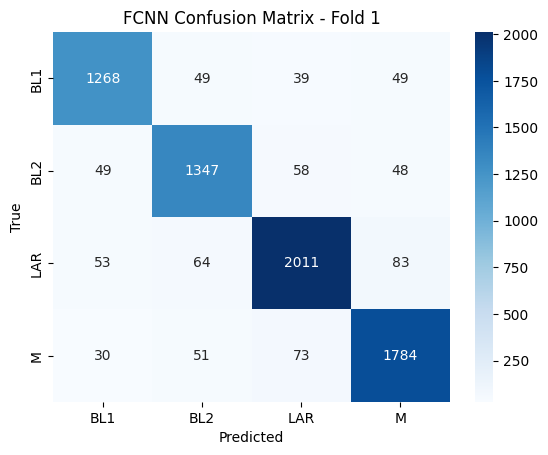


Multi-Class AUC (Fold 1): 0.9897


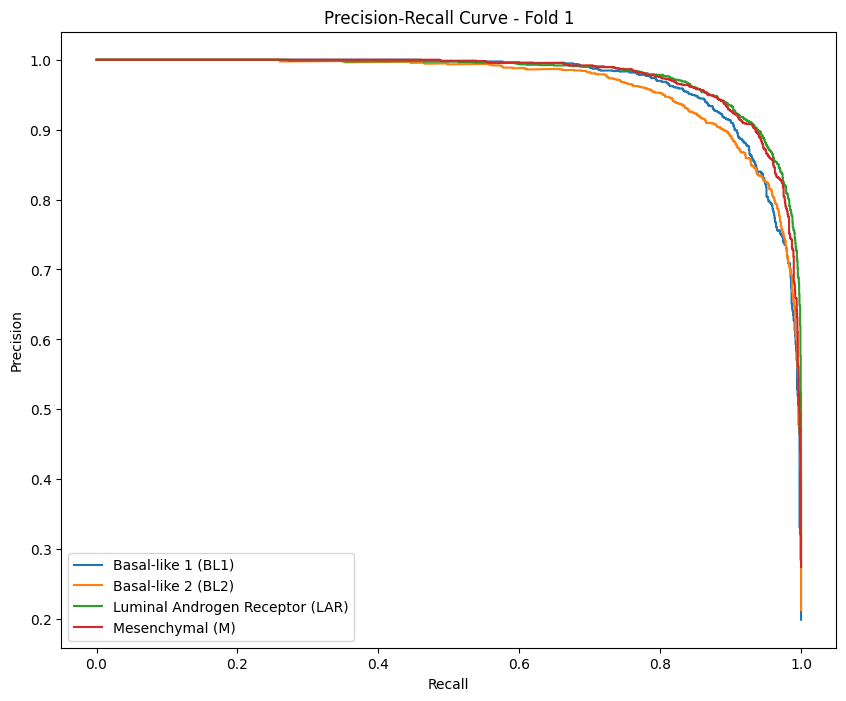

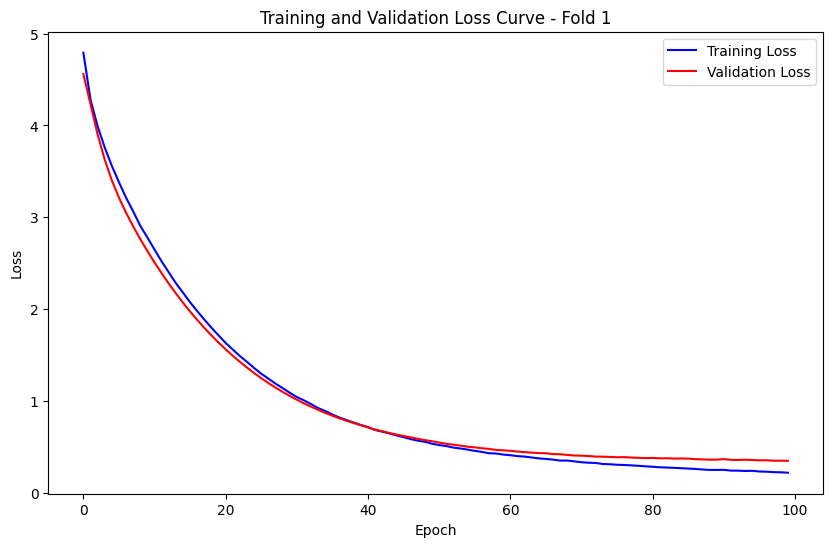

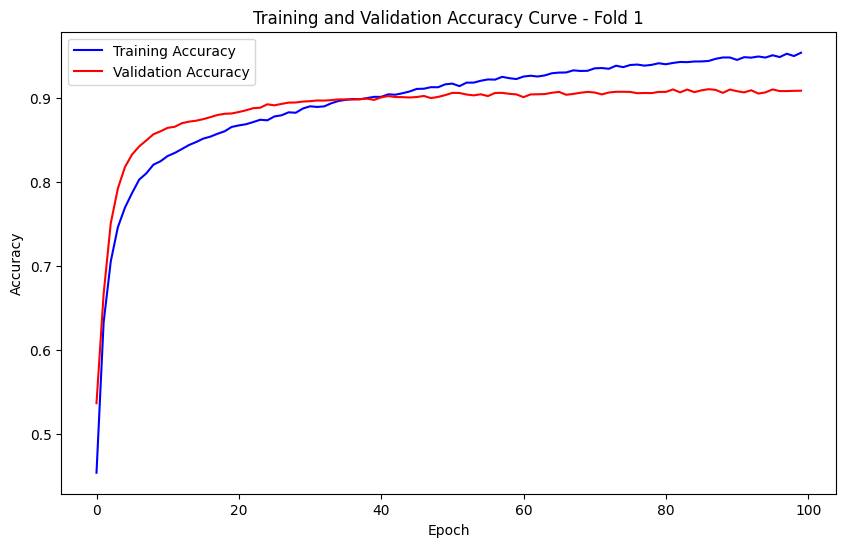


===== Fold 2 =====

Best Hyperparameters for Fold 2:
{'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 48, 'dropout_3': 0.1, 'learning_rate': 0.00012604817165131596}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.3456 - loss: 5.2060 - val_accuracy: 0.5331 - val_loss: 4.6063 - learning_rate: 1.2605e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6148 - loss: 4.4087 - val_accuracy: 0.6781 - val_loss: 4.2415 - learning_rate: 1.2605e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - loss: 4.0820 - val_accuracy: 0.7474 - val_loss: 3.9315 - learning_rate: 1.2605e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7480 - loss: 3.8483 - val_accuracy: 0.7830 - val_loss: 3.6773 - learning_rate: 1.2605e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 3.6730 - val_accuracy: 0.8047 - val_loss: 3.4770 - learning_rate: 1.2605e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7863 - loss: 3.4910 - val_accuracy: 0.8184 - val_loss: 3.3060 - learning_rate: 1.2605e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 3.3

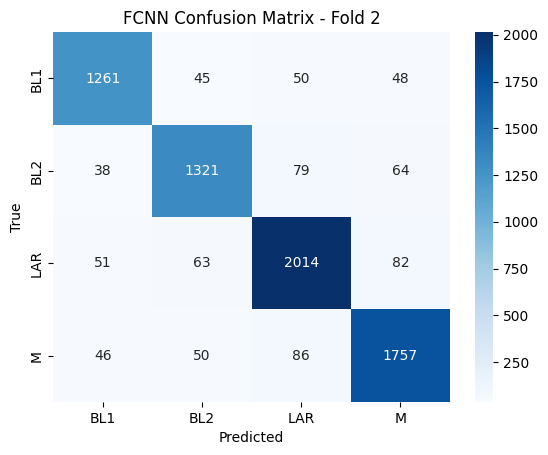


Multi-Class AUC (Fold 2): 0.9881


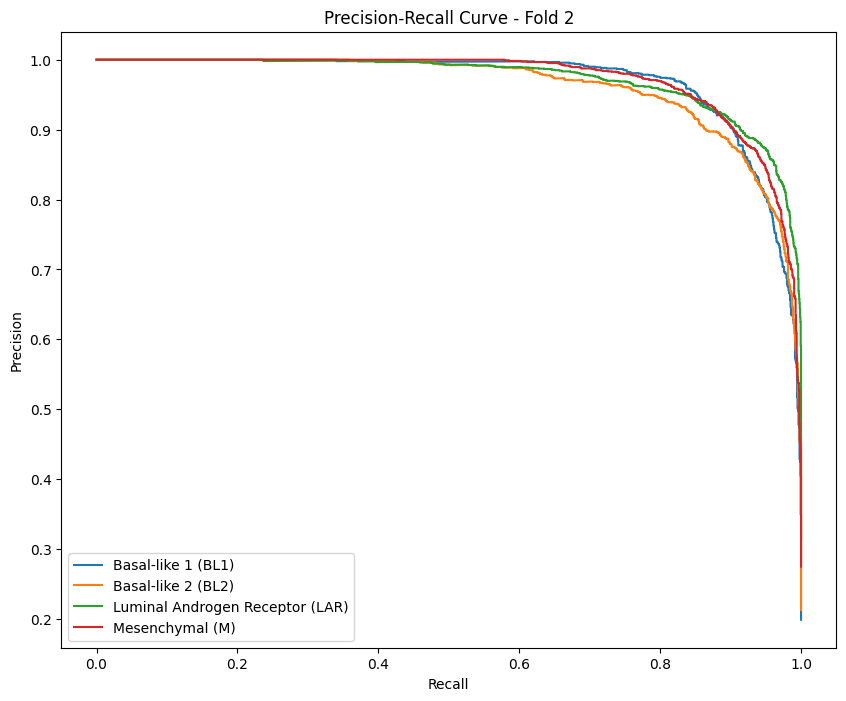

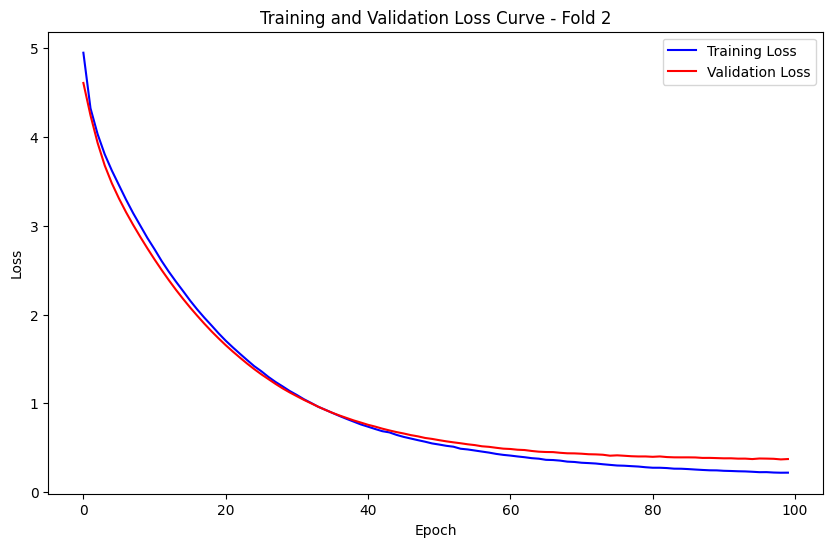

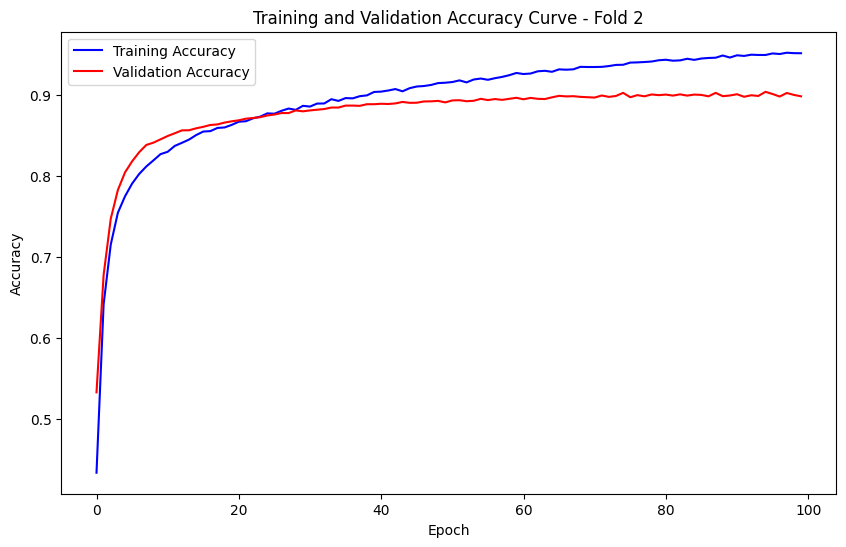


===== Fold 3 =====

Best Hyperparameters for Fold 3:
{'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 48, 'dropout_3': 0.1, 'learning_rate': 0.00012604817165131596}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.3499 - loss: 5.0607 - val_accuracy: 0.5823 - val_loss: 4.5505 - learning_rate: 1.2605e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6019 - loss: 4.3922 - val_accuracy: 0.6916 - val_loss: 4.2135 - learning_rate: 1.2605e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7029 - loss: 4.0466 - val_accuracy: 0.7654 - val_loss: 3.8860 - learning_rate: 1.2605e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7430 - loss: 3.8161 - val_accuracy: 0.8043 - val_loss: 3.6092 - learning_rate: 1.2605e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7766 - loss: 3.5931 - val_accuracy: 0.8237 - val_loss: 3.3905 - learning_rate: 1.2605e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7914 - loss: 3.4229 - val_accuracy: 0.8391 - val_loss: 3.2063 - learning_rate: 1.2605e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 3.2

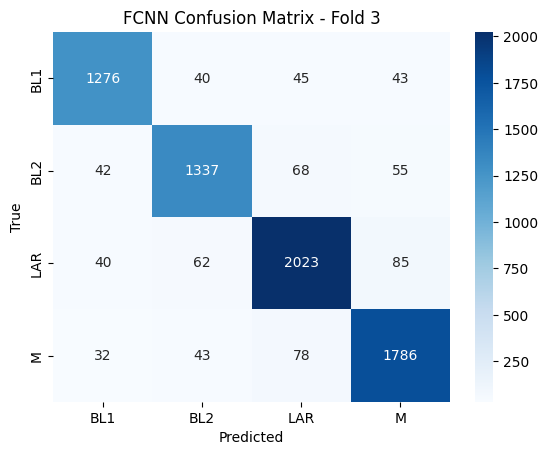


Multi-Class AUC (Fold 3): 0.9897


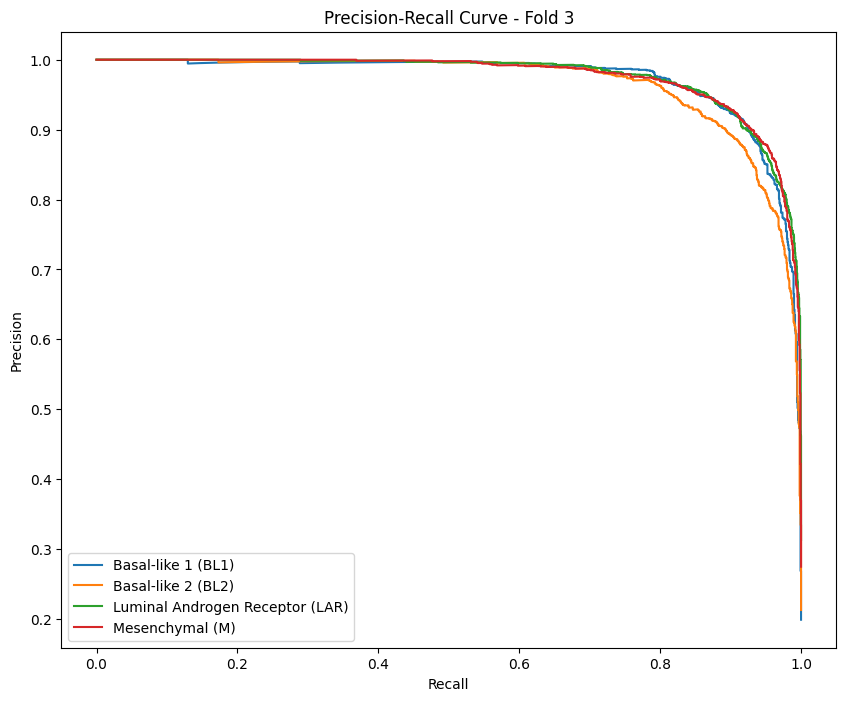

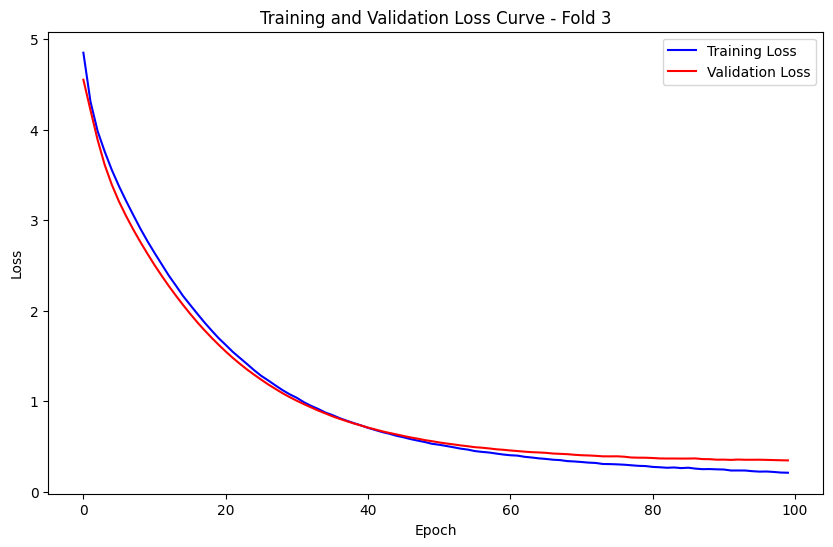

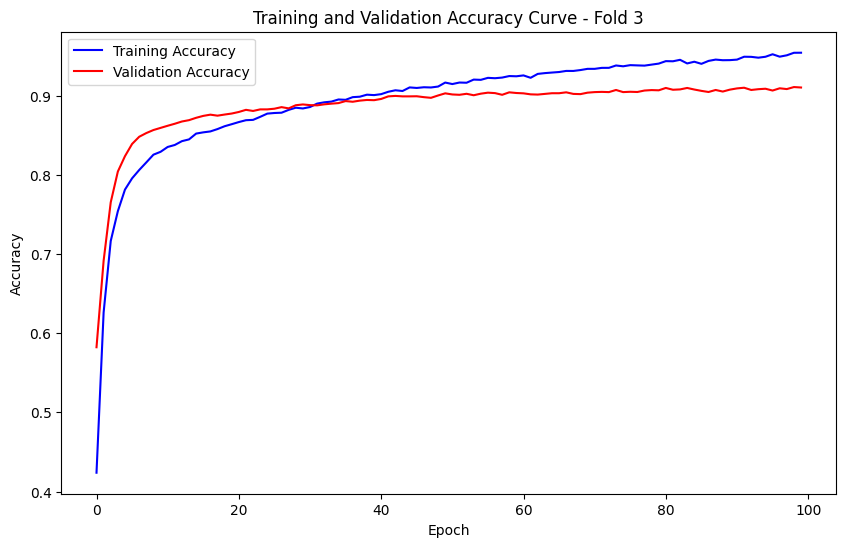


===== Fold 4 =====

Best Hyperparameters for Fold 4:
{'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 48, 'dropout_3': 0.1, 'learning_rate': 0.00012604817165131596}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.3771 - loss: 5.0837 - val_accuracy: 0.6126 - val_loss: 4.5306 - learning_rate: 1.2605e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6214 - loss: 4.3694 - val_accuracy: 0.7032 - val_loss: 4.1804 - learning_rate: 1.2605e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7060 - loss: 4.0622 - val_accuracy: 0.7748 - val_loss: 3.8694 - learning_rate: 1.2605e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7442 - loss: 3.8293 - val_accuracy: 0.8139 - val_loss: 3.6151 - learning_rate: 1.2605e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 3.6436 - val_accuracy: 0.8333 - val_loss: 3.4078 - learning_rate: 1.2605e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7847 - loss: 3.4665 - val_accuracy: 0.8428 - val_loss: 3.2362 - learning_rate: 1.2605e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7992 - loss: 3.3

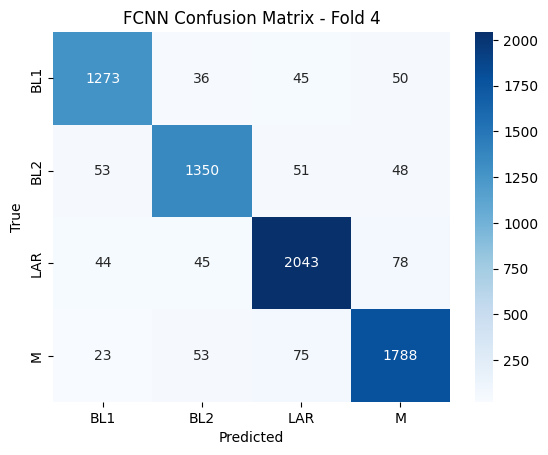


Multi-Class AUC (Fold 4): 0.9898


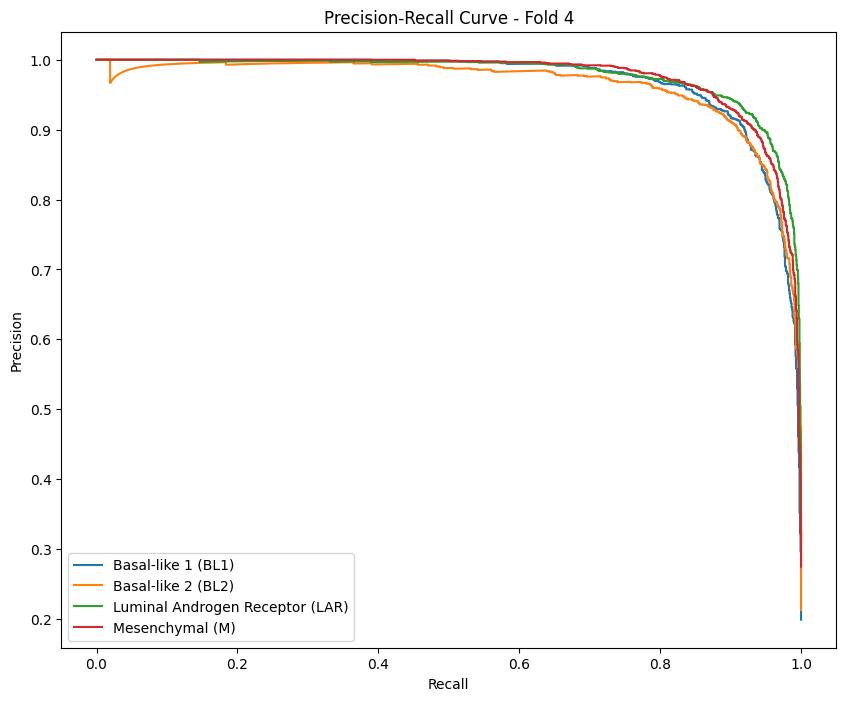

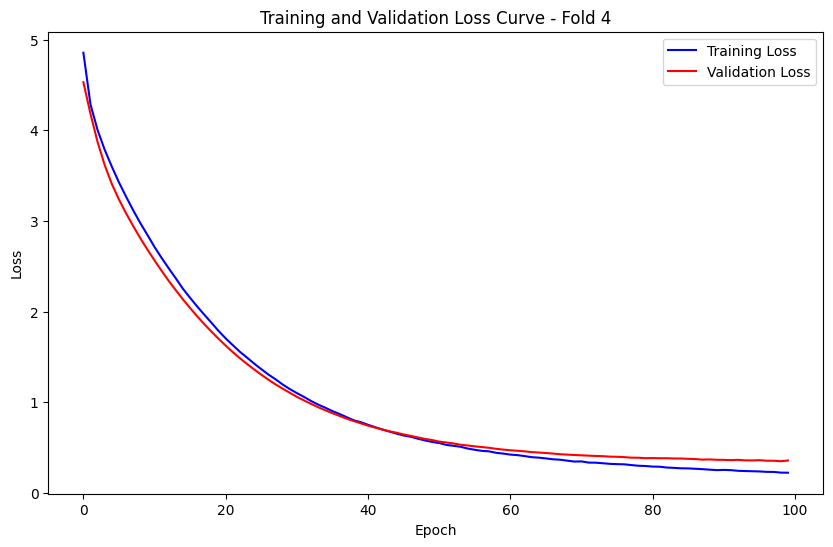

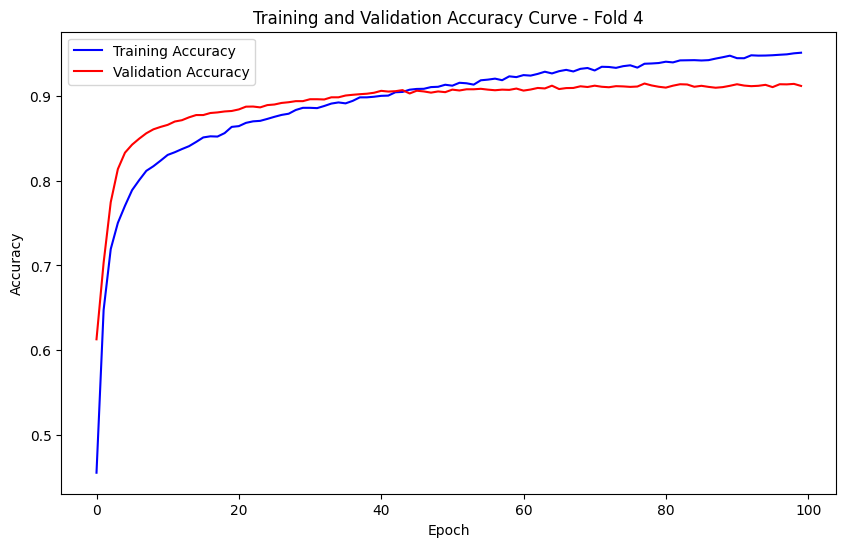


===== Fold 5 =====

Best Hyperparameters for Fold 5:
{'units_1': 256, 'dropout_1': 0.2, 'units_2': 128, 'dropout_2': 0.2, 'units_3': 48, 'dropout_3': 0.1, 'learning_rate': 0.00012604817165131596}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.3753 - loss: 5.0122 - val_accuracy: 0.6177 - val_loss: 4.5358 - learning_rate: 1.2605e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6000 - loss: 4.4036 - val_accuracy: 0.7254 - val_loss: 4.2028 - learning_rate: 1.2605e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6929 - loss: 4.0839 - val_accuracy: 0.7817 - val_loss: 3.8857 - learning_rate: 1.2605e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7453 - loss: 3.8284 - val_accuracy: 0.8043 - val_loss: 3.6155 - learning_rate: 1.2605e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7769 - loss: 3.6129 - val_accuracy: 0.8242 - val_loss: 3.3927 - learning_rate: 1.2605e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7938 - loss: 3.4171 - val_accuracy: 0.8342 - val_loss: 3.2090 - learning_rate: 1.2605e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8045 - loss: 3.2

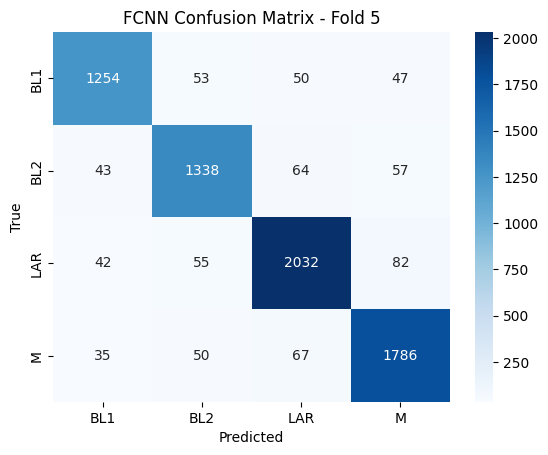


Multi-Class AUC (Fold 5): 0.9891


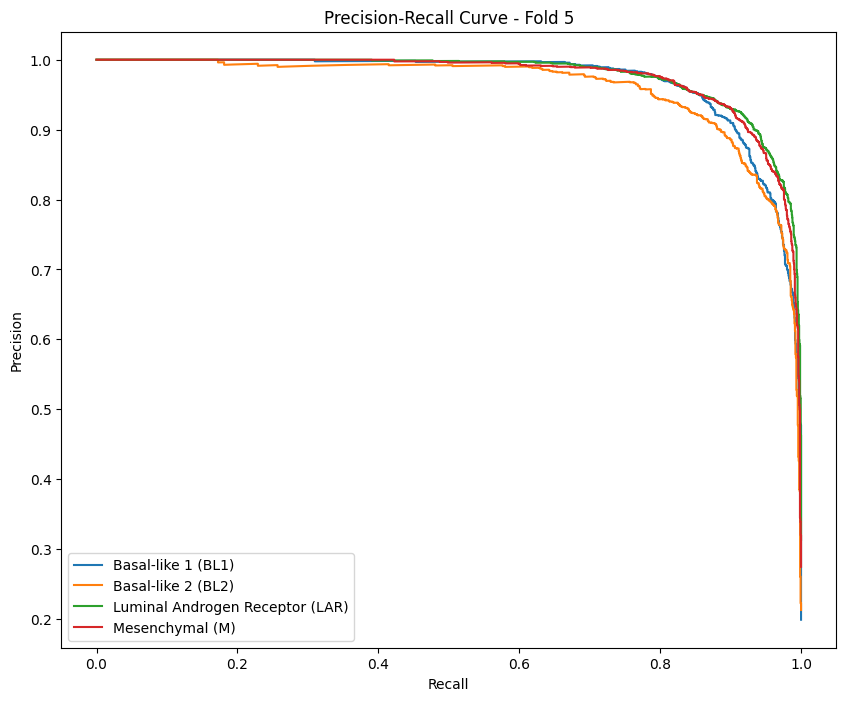

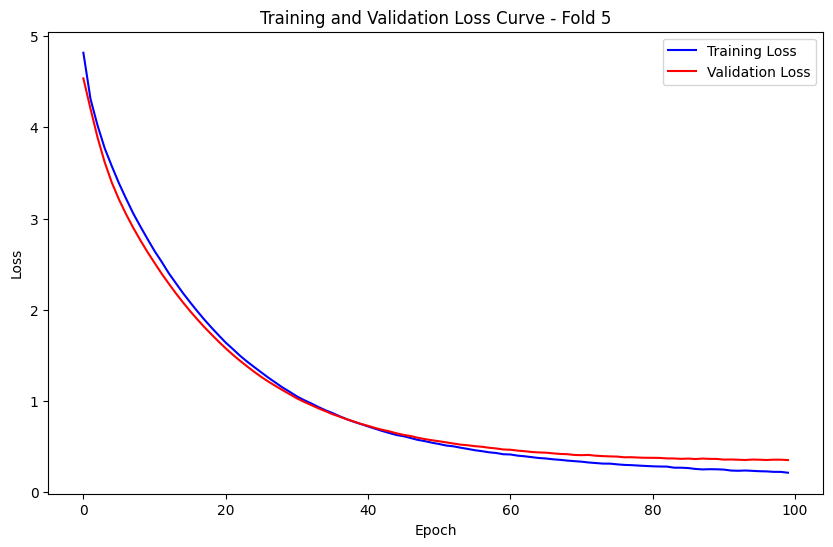

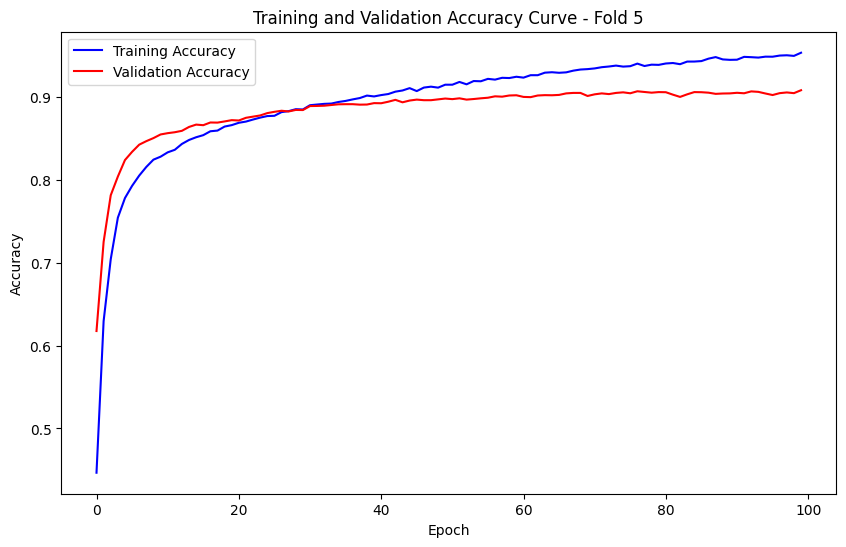


===== Cross-Validation Results =====
   fold  accuracy  auc_score
0     1  0.908588   0.989697
1     2  0.898795   0.988124
2     3  0.910418   0.989697
3     4  0.912261   0.989792
4     5  0.908575   0.989068

Mean Accuracy: 0.9077
Mean AUC Score: 0.9893

🎯 Best Fold (Fold 4) Accuracy: 0.9123
🎯 Best Fold AUC Score: 0.9898


In [ ]:

# ======================= Encode Target Variable =======================
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features

# ======================= Standardize Features =======================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ======================= Stratified K-Fold =======================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ======================= Build Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X.shape[1],)),

        # First Dense Layer
        tf.keras.layers.Dense(hp.Int('units_1', min_value=64, max_value=256, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)),

        # Second Dense Layer
        tf.keras.layers.Dense(hp.Int('units_2', min_value=32, max_value=128, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)),

        # Third Dense Layer
        tf.keras.layers.Dense(hp.Int('units_3', min_value=16, max_value=64, step=16),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_3', 0.1, 0.5, step=0.1)),

        # Output Layer
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# ======================= Train and Evaluate Using K-Fold =======================
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Hyperparameter tuning
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 batch_size=512)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
    print(f"\nBest Hyperparameters for Fold {fold}:\n{best_hps.values}")

    # Build model with best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # ===========Callbacks (Early Stopping + Learning Rate Scheduler)===========
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-5
    )

    # ===========Train model===============
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=512,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_pred_proba = model.predict(X_test)

    # ======================= Metrics =======================
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
    plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    # ===========ROC-AUC Score===========
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')
    print(f"\nMulti-Class AUC (Fold {fold}): {auc_score:.4f}")

    # ===========Precision-Recall Curve===========
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - Fold {fold}")
    plt.legend()
    plt.show()

    # ===========Loss and Accuracy Curves===========
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title(f"Training and Validation Loss Curve - Fold {fold}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title(f"Training and Validation Accuracy Curve - Fold {fold}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Save results
    results.append({
        'fold': fold,
        'accuracy': history.history['val_accuracy'][-1],
        'auc_score': auc_score
    })

    fold += 1

# ======================= Overall Results =======================
df_results = pd.DataFrame(results)
print("\n===== Cross-Validation Results =====")
print(df_results)
print(f"\nMean Accuracy: {df_results['accuracy'].mean():.4f}")
print(f"Mean AUC Score: {df_results['auc_score'].mean():.4f}")

best_fold = df_results.loc[df_results['accuracy'].idxmax()]
print(f"\n🎯 Best Fold (Fold {int(best_fold['fold'])}) Accuracy: {best_fold['accuracy']:.4f}")
print(f"🎯 Best Fold AUC Score: {best_fold['auc_score']:.4f}")

##===Save Models for Comparabilty and Web App======

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/SAVED_MODELS/DEEPLEARNING/FULL_METABOLITES/FCNN_M.pth')
print("FCNN model saved successfully!")

### ========================== SHAP Integration ==========================

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ====================== Create SHAP Explainer ======================
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Extract feature names
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns



PermutationExplainer explainer: 7056it [08:03, 14.41it/s]                          


## ==========SHAP Summary and Feature Importance for Multi-Class Classification======
By analyzing both the overall SHAP summary and the class-specific SHAP summaries, we will gain deeper biological insights into which metabolites drive the classification of each TNBC subtype ('Basal-like 1 (BL1)','Mesenchymal (M)','Basal-like 2 (BL2)','Luminal Androgen Receptor (LAR). This will help you interpret:

✅ Overall drivers → Which metabolites are most important for predicting TNBC subtypes as a whole.
✅ Subtype-specific drivers → Which metabolites are driving predictions for each specific subtype.
✅ Direction of effect → Whether a metabolite increases or decreases the likelihood of a specific subtype (positive vs negative SHAP values).

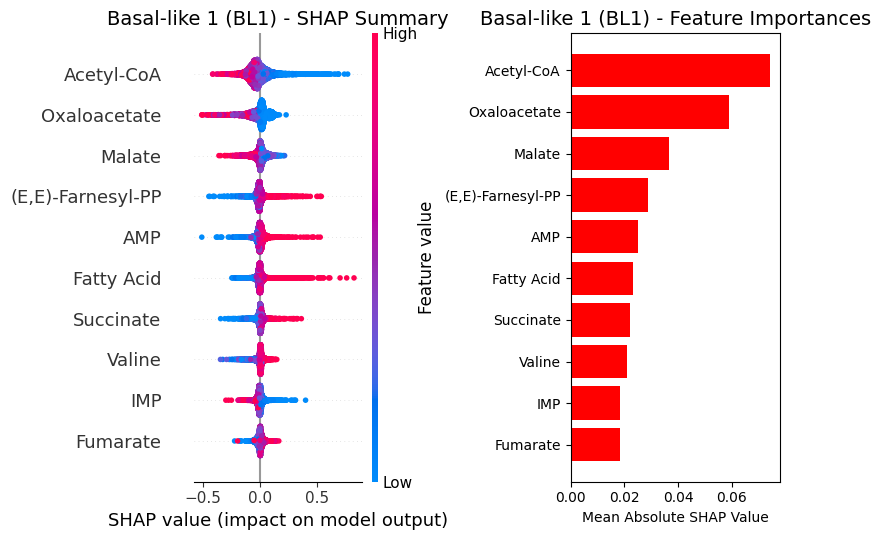


🔍 Top 10 Subtype-Specific Metabolites for 'Basal-like 1 (BL1)':
Acetyl-CoA           0.074253
Oxaloacetate         0.058954
Malate               0.036510
(E,E)-Farnesyl-PP    0.028652
AMP                  0.025114
Fatty Acid           0.023074
Succinate            0.022072
Valine               0.021079
IMP                  0.018355
Fumarate             0.018209
dtype: float64


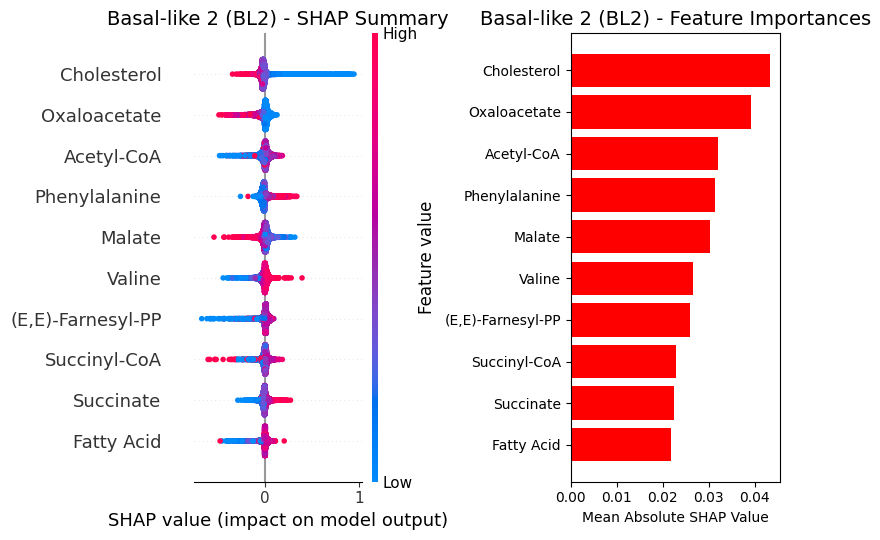


🔍 Top 10 Subtype-Specific Metabolites for 'Basal-like 2 (BL2)':
Cholesterol          0.043365
Oxaloacetate         0.039161
Acetyl-CoA           0.032149
Phenylalanine        0.031353
Malate               0.030395
Valine               0.026580
(E,E)-Farnesyl-PP    0.025909
Succinyl-CoA         0.022873
Succinate            0.022434
Fatty Acid           0.021924
dtype: float64


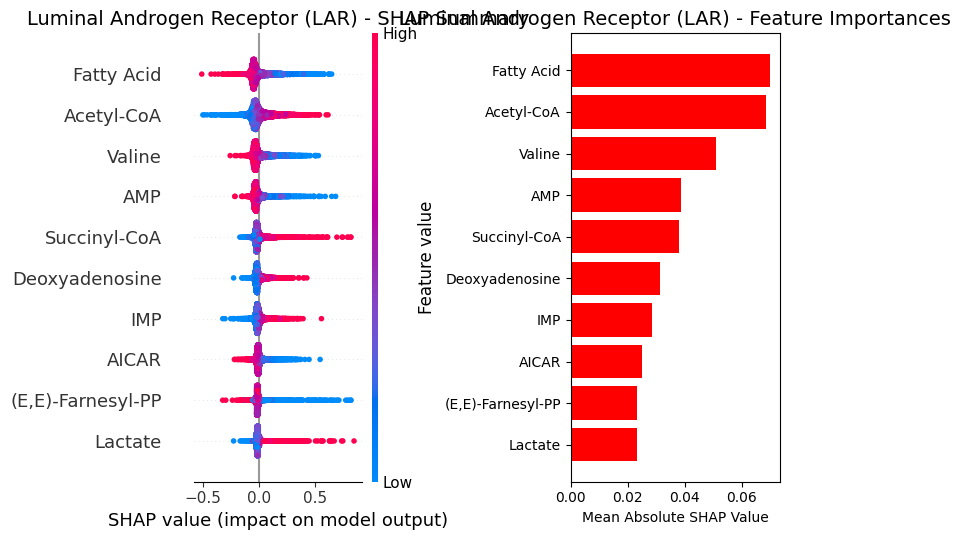


🔍 Top 10 Subtype-Specific Metabolites for 'Luminal Androgen Receptor (LAR)':
Fatty Acid           0.069986
Acetyl-CoA           0.068654
Valine               0.051126
AMP                  0.038729
Succinyl-CoA         0.038183
Deoxyadenosine       0.031289
IMP                  0.028680
AICAR                0.024965
(E,E)-Farnesyl-PP    0.023390
Lactate              0.023192
dtype: float64


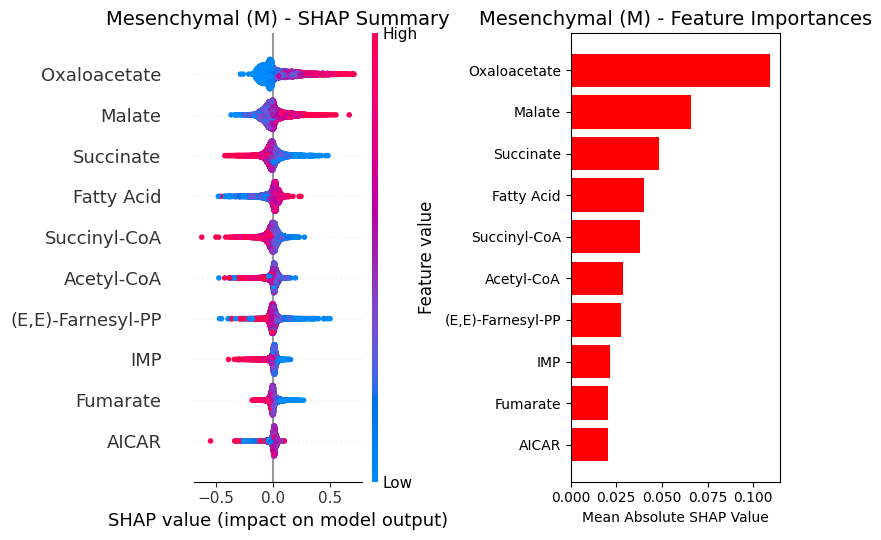


🔍 Top 10 Subtype-Specific Metabolites for 'Mesenchymal (M)':
Oxaloacetate         0.109140
Malate               0.065955
Succinate            0.048178
Fatty Acid           0.040182
Succinyl-CoA         0.037904
Acetyl-CoA           0.028824
(E,E)-Farnesyl-PP    0.027632
IMP                  0.021743
Fumarate             0.020504
AICAR                0.020181
dtype: float64


In [ ]:
# ====================== Plot Subtype-Specific SHAP Analysis ======================
for i, class_name in enumerate(label_encoder.classes_):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

    # ✅ SHAP Summary Plot (Subtype-specific)
    plt.sca(axes[0])
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_test,
        feature_names=feature_names,
        max_display=10,
        show=False
    )
    axes[0].set_title(f"{class_name} - SHAP Summary", fontsize=14)

    # ✅ Feature Importance Plot (Subtype-specific)
    class_importance = np.abs(shap_values.values[:, :, i]).mean(axis=0)
    top_features = pd.Series(class_importance, index=feature_names).nlargest(10)

    axes[1].barh(
        y=top_features.index[::-1],  # Reverse order for better visual
        width=top_features.values[::-1],
        color='red'
    )
    axes[1].set_title(f"{class_name} - Feature Importances", fontsize=14)
    axes[1].set_xlabel("Mean Absolute SHAP Value")

    plt.tight_layout()
    plt.show()

    print(f"\n🔍 Top 10 Subtype-Specific Metabolites for '{class_name}':")
    print(top_features)



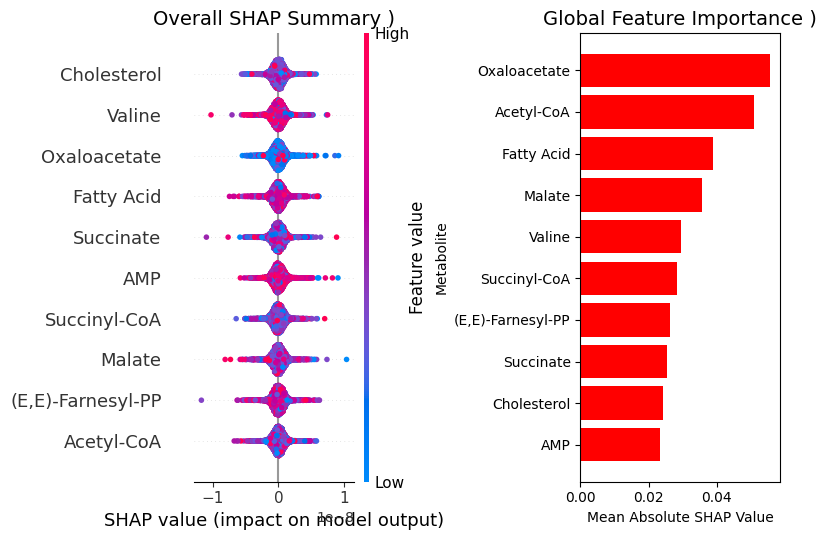


📌 Overall Top 10 Metabolites Driving TNBC Subtype Predictions:
Oxaloacetate         0.055714
Acetyl-CoA           0.050970
Fatty Acid           0.038791
Malate               0.035579
Valine               0.029589
Succinyl-CoA         0.028450
(E,E)-Farnesyl-PP    0.026396
Succinate            0.025317
Cholesterol          0.024247
AMP                  0.023282
dtype: float64


In [ ]:
# ====================== Compute Overall Feature Importance ======================
overall_importance = np.abs(shap_values.values).mean(axis=(0, 2))  # Across all samples and classes
overall_importance_series = pd.Series(overall_importance, index=feature_names)
top_overall_features = overall_importance_series.nlargest(10)
top_feature_names = top_overall_features.index.tolist()
top_indices = [list(feature_names).index(f) for f in top_feature_names]

# Extract SHAP values and X_test subset for top 10 overall features
shap_top_values = shap_values.values[:, top_indices, :].mean(axis=2)
X_test_top = pd.DataFrame(X_test[:, top_indices], columns=top_feature_names)

# ====================== Plot Overall SHAP Summary and Importance ======================
fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1]})

# ✅ SHAP Summary Plot (Overall)
plt.sca(axes[0])
shap.summary_plot(
    shap_top_values,
    X_test_top,
    feature_names=top_feature_names,
    max_display=10,
    show=False
)
axes[0].set_title("Overall SHAP Summary )", fontsize=14)

# ✅ Feature Importance Plot (Overall)
axes[1].barh(
    y=top_overall_features.index[::-1],
    width=top_overall_features.values[::-1],
    color='red'
)
axes[1].set_title("Global Feature Importance )", fontsize=14)
axes[1].set_xlabel("Mean Absolute SHAP Value")
axes[1].set_ylabel("Metabolite")

plt.tight_layout()
plt.show()

# ✅ Print Overall Top 10 Features
print("\n📌 Overall Top 10 Metabolites Driving TNBC Subtype Predictions:")
print(top_overall_features)


In [ ]:
print(X_test.shape)

(7055, 70)


Interactive SHAP Plot: Selecting Features
From your feature importance lists, the top features for each TNBC subtype (BL1, BL2, LAR, and M) vary slightly, but there are common metabolites like Acetyl-CoA, Oxaloacetate, Malate, Fatty Acid, and Valine that appear consistently. These are likely the most important features across the subtypes, so they would be ideal candidates for an interactive SHAP plot.

Why focus on these features for the interaction plot?
Top Features: As these features are most impactful in the model's predictions, understanding how their interactions influence the subtype classifications is crucial for deeper model interpretability.

Feature Relationships: Analyzing interactions between metabolites like Acetyl-CoA and Oxaloacetate, for example, could reveal how their combined presence (or absence) in the tumor microenvironment drives specific TNBC subtypes, influencing metabolic pathways that distinguish them.

Suggested Features for SHAP Interaction Plots
Based on your results, here are some potential pairings of top features from each subtype for interaction plots:

Acetyl-CoA and Oxaloacetate:

These two features appear prominently in BL1, BL2, LAR, and M subtypes. Their interaction might highlight how shifts in the TCA cycle and acetylation pathways influence TNBC subtypes.

Why interact? The relationship between Acetyl-CoA and Oxaloacetate could indicate key metabolic shifts influencing cellular processes like energy production and biosynthesis, which may vary across TNBC subtypes.

Fatty Acid and Malate:

Fatty Acid and Malate also appear in the top 5 for several subtypes, suggesting their central role in TNBC subtype classification.

Why interact? Fatty acid metabolism and malate's involvement in the TCA cycle might be connected to cell survival, proliferation, or metastasis in different TNBC subtypes, which warrants investigation.

Valine and Succinate:

Valine is essential in the protein metabolism and signaling pathways, while Succinate plays a role in energy metabolism.

Why interact? A potential interaction between these two metabolites may indicate an alteration in cellular metabolism related to anabolic and catabolic processes, which can impact tumor behavior differently across TNBC subtypes.

Cholesterol and Acetyl-CoA:

In BL2 and LAR, Cholesterol and Acetyl-CoA are important, potentially indicating lipogenesis and steroidogenesis.

Why interact? Understanding how cholesterol and acetylation pathways work together can shed light on cancer cell membrane stability, signal transduction, and metabolic reprogramming in these TNBC subtypes.

SHAP Interaction Plot Code Example
python
Copy
Edit
# Select top 2 features for interaction plot based on feature importance
feature1 = 'Acetyl-CoA'
feature2 = 'Oxaloacetate'

# Create SHAP interaction plot for these top features
shap.interaction_plot(feature1, feature2, shap_values, X_test)
You can create multiple interaction plots with different combinations of features based on importance and relevance.

Further Exploration for Thesis, Results, and Discussion:
Metabolic Pathways:

Explore the biological significance of the top features in known metabolic pathways.

Example: Acetyl-CoA, Malate, and Succinate are critical in the TCA cycle. Understanding how their variation across TNBC subtypes may affect cellular respiration and energy production could provide insights into metabolic reprogramming in cancer.

Correlation with Pathway Enrichment:

Examine how these features correlate with pathway enrichment analysis results.

Example: Investigate whether TNBC subtypes that have higher levels of Acetyl-CoA also show increased activity in specific metabolic pathways like fatty acid metabolism or glycolysis.

Feature Interactions in Subtypes:

Compare feature interactions across TNBC subtypes.

Example: Does the interaction between Acetyl-CoA and Fatty Acid lead to different subtype predictions compared to Acetyl-CoA and Valine? This could reflect distinct metabolic signatures that distinguish aggressive subtypes from less aggressive ones.

Impact on Tumor Behavior:

Dive into how metabolic shifts related to these features can drive tumor progression, treatment resistance, or metastasis.

Example: Explore whether the higher importance of Oxaloacetate in the LAR subtype is associated with energy production or therapeutic resistance.

Visualize Temporal Changes:

If possible, explore temporal changes in metabolite levels (from other datasets or longitudinal studies). Do the key features show time-dependent shifts that might explain the progression of different TNBC subtypes?

Clinical Implications:

Consider how these metabolites could be targeted for therapeutic purposes.

Example: Could Acetyl-CoA or Malate be targeted with drugs to slow down the growth of specific TNBC subtypes? What potential metabolic therapies can be derived from this analysis?

By conducting these analyses and visualizations, you can add depth to your thesis, discussing how metabolic features drive TNBC subtype predictions and how they relate to biological processes and clinical outcomes.

## ===============SHAP DEPENDENT PLOT IN EACH TNBC SUBTYPE ===============

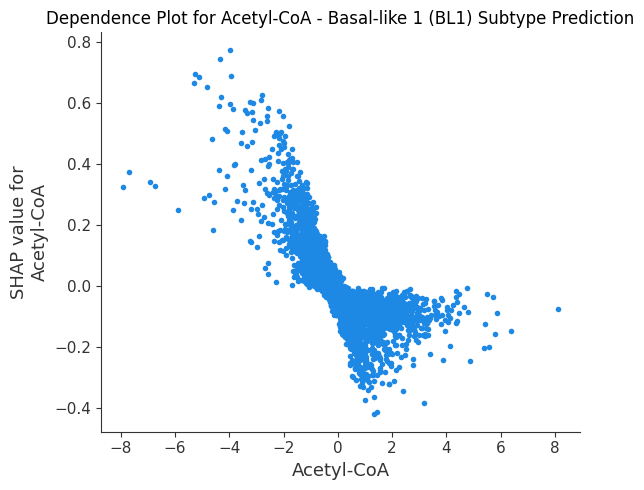

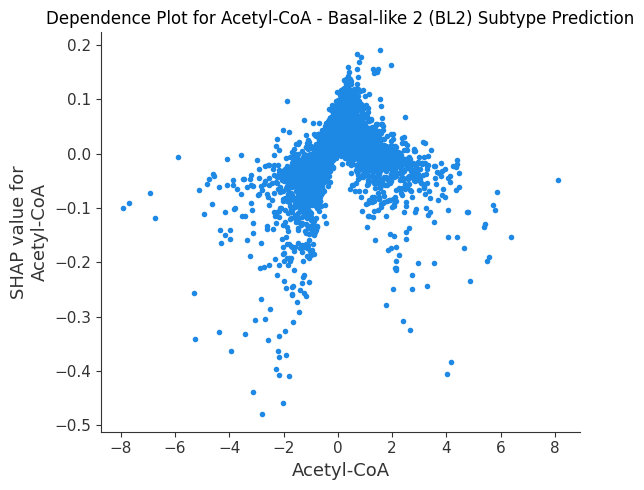

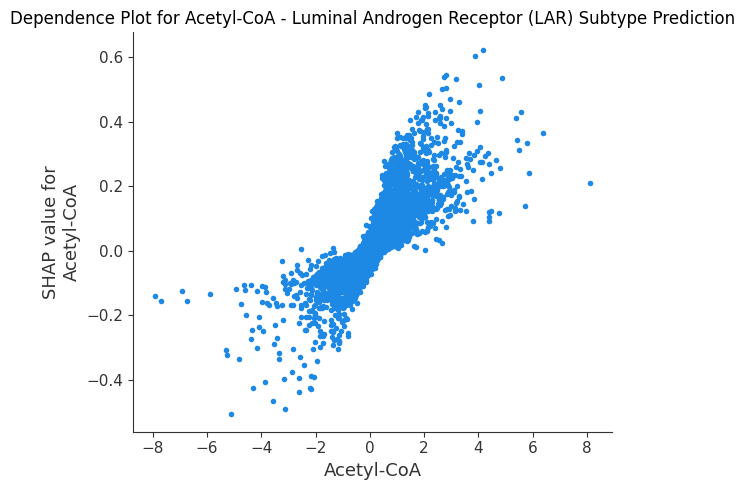

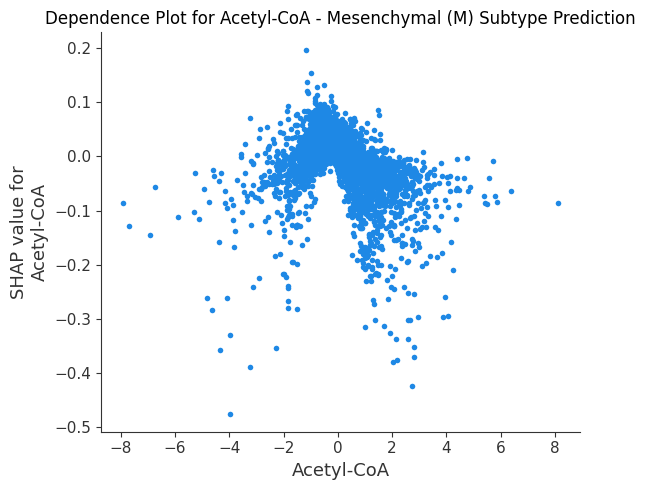

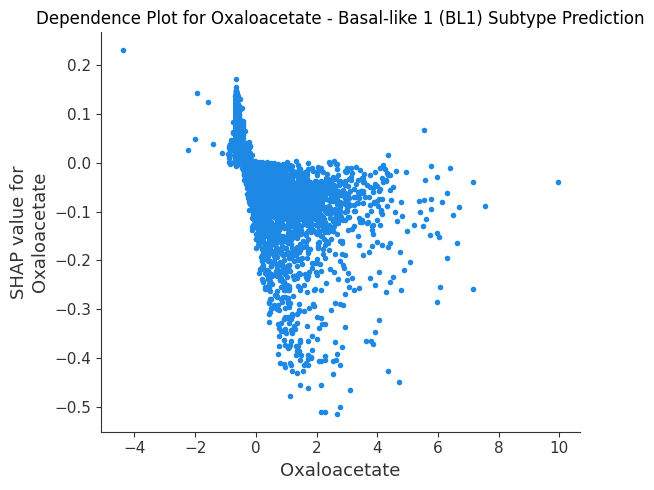

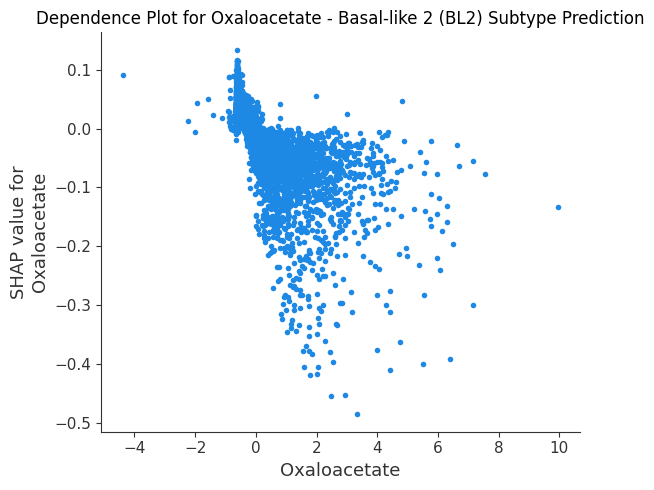

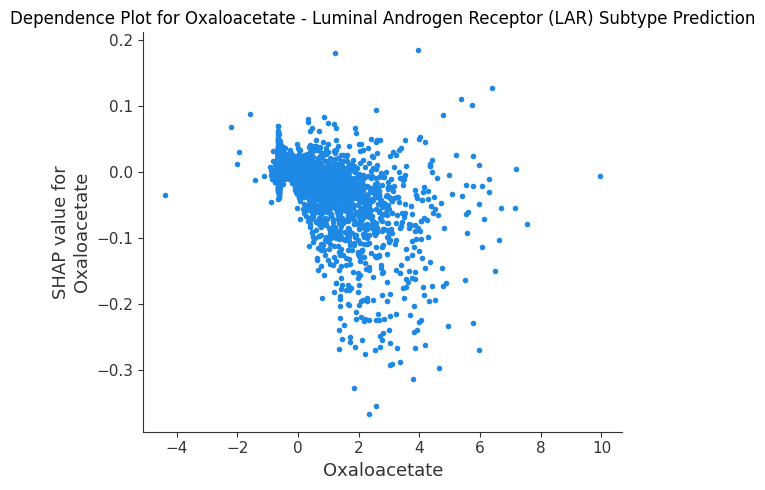

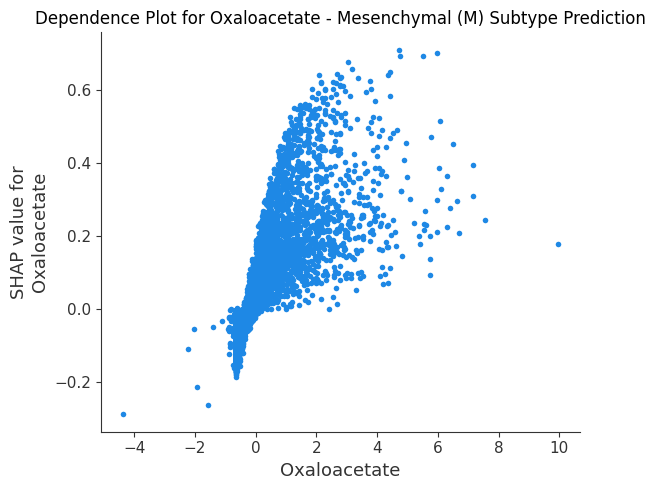

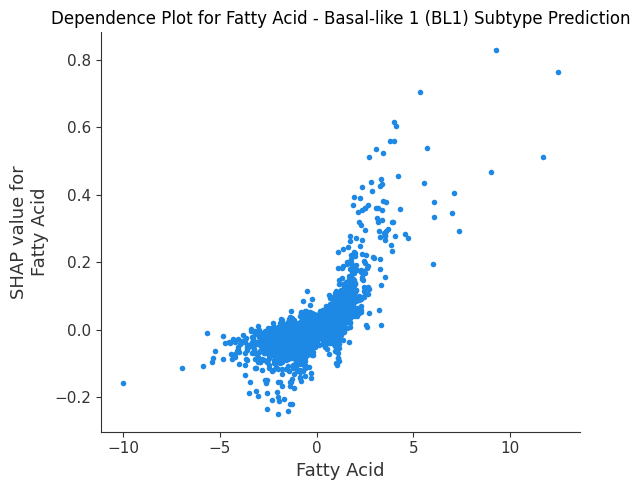

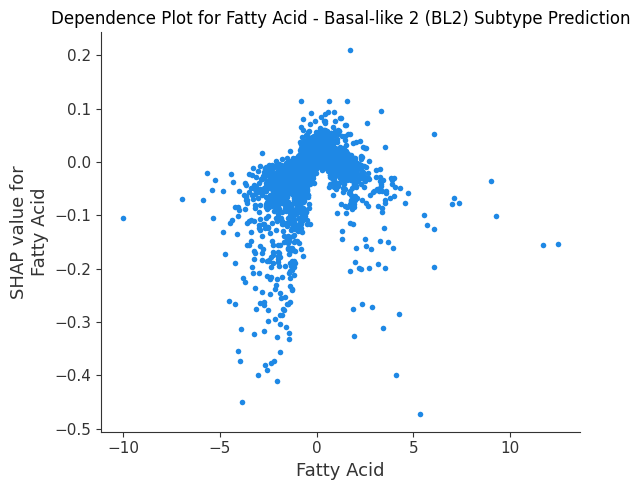

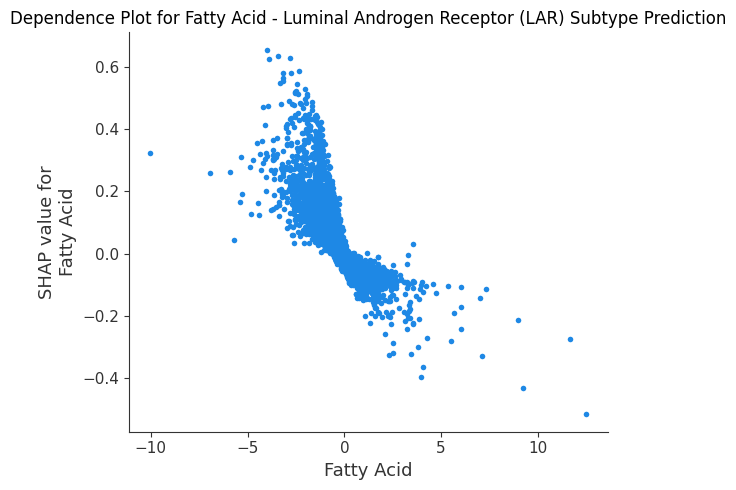

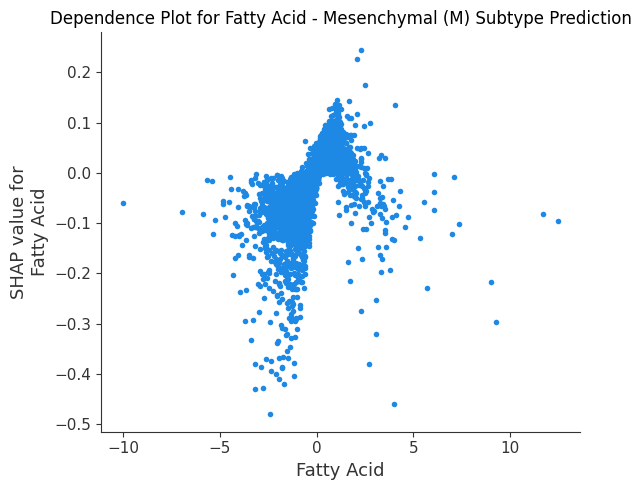

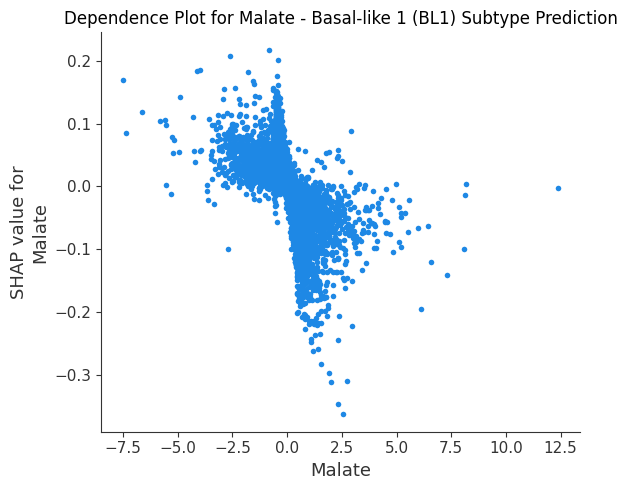

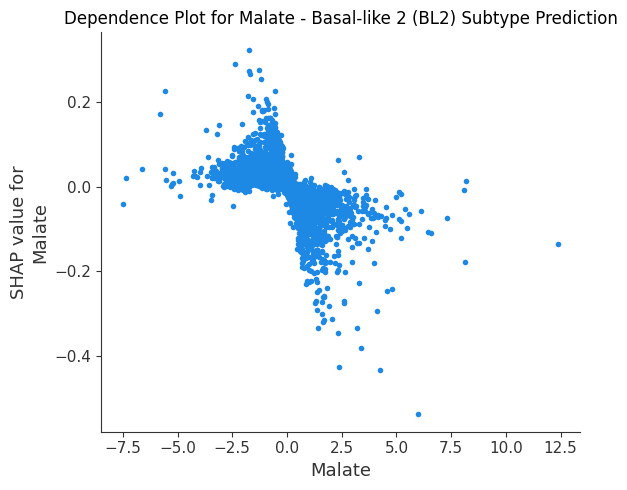

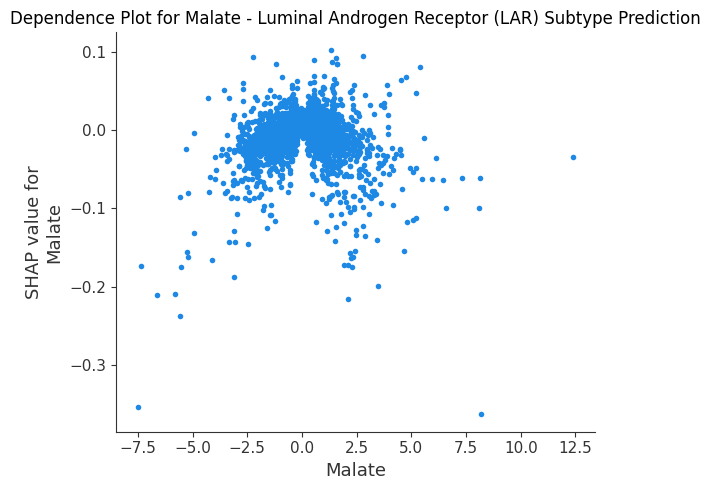

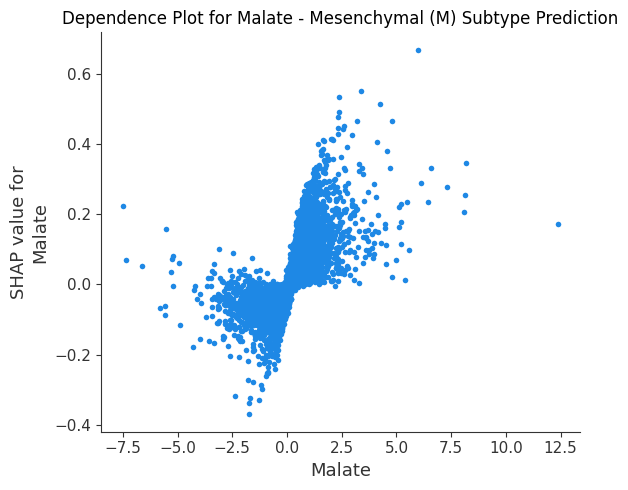

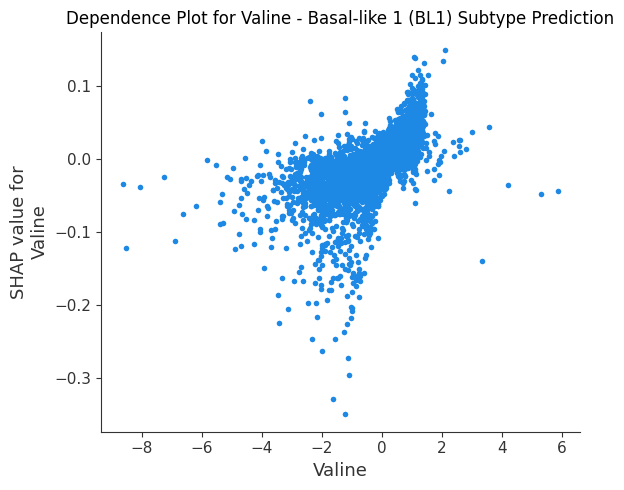

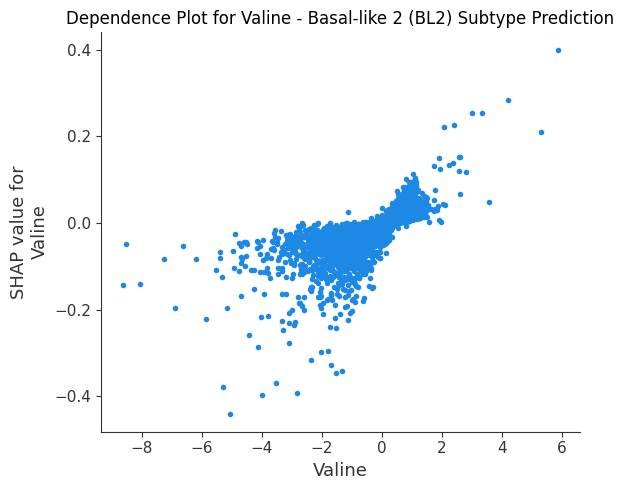

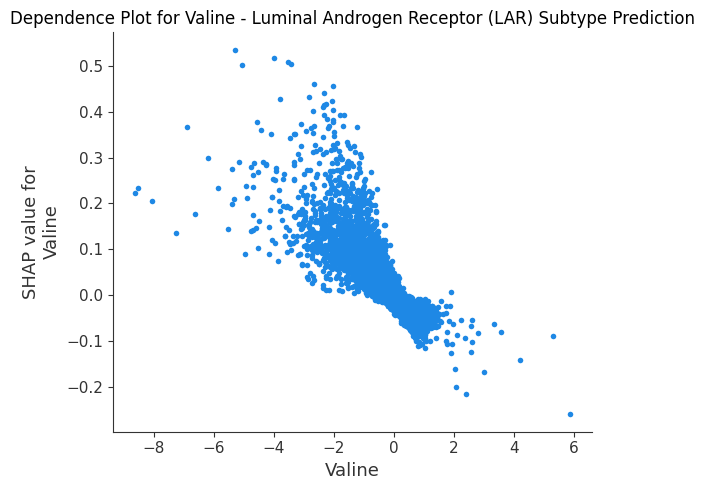

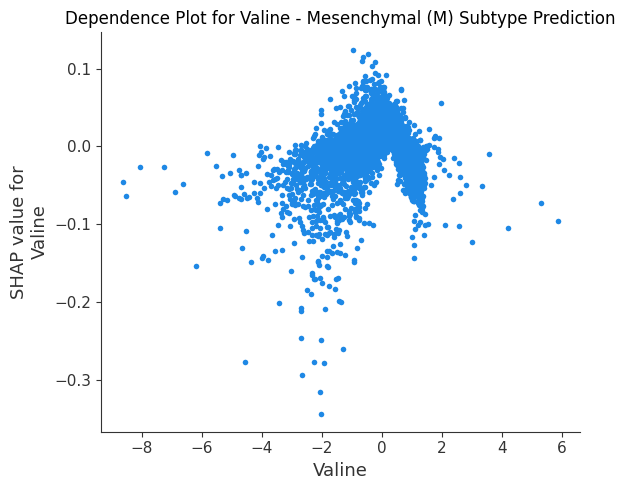

In [ ]:
# List of features to create dependence plots for
top_features = ['Acetyl-CoA', 'Oxaloacetate', 'Fatty Acid', 'Malate', 'Valine']

# Loop through each feature to generate dependence plots
for feature in top_features:
    for i, class_name in enumerate(label_encoder.classes_):
        # Create SHAP dependence plot for each top feature
        shap.dependence_plot(
            feature,  # Feature name
            shap_values.values[:, :, i],  # SHAP values for the class
            X_test,  # Test data
            feature_names=feature_names,  # Feature names
            interaction_index=None,  # Optionally set interaction index for feature interaction
            show=False
        )

        # Add title and show plot
        plt.title(f'Dependence Plot for {feature} - {class_name} Subtype Prediction')
        plt.tight_layout()
        plt.show()



#                     ======SHAP INTERACTION PLOT======

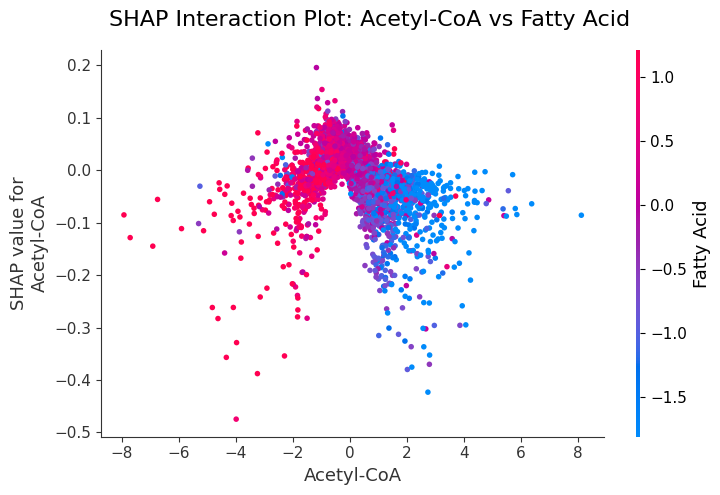

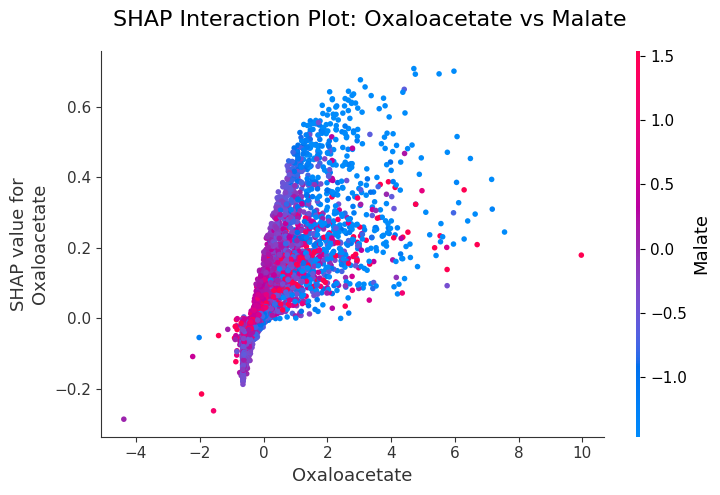

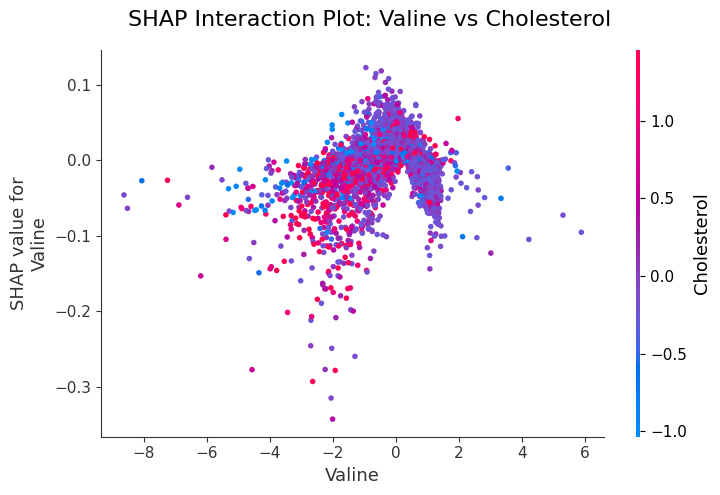

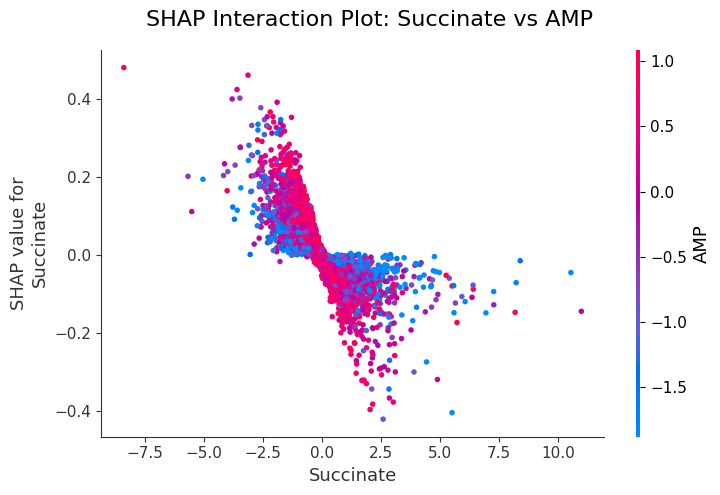

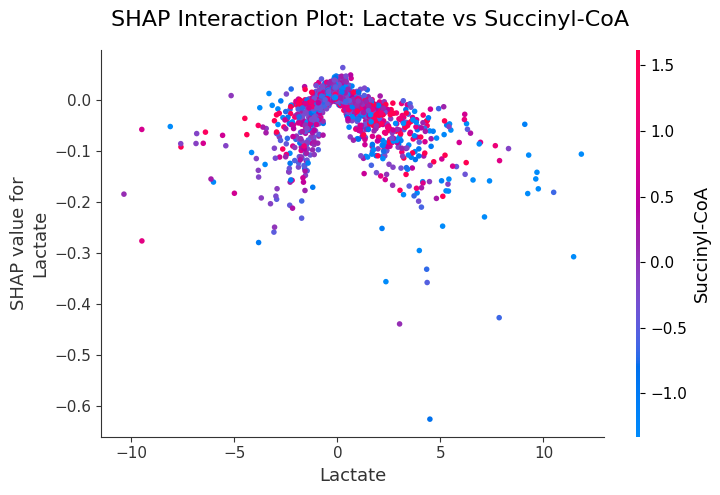

In [ ]:
# Set feature names (you can adjust this to your actual feature names)
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# ====================== Interaction SHAP Plots ======================

# Create a list of feature pairs for interaction plots
feature_pairs = [
    ("Acetyl-CoA", "Fatty Acid"),
    ("Oxaloacetate", "Malate"),
    ("Valine", "Cholesterol"),
    ("Succinate", "AMP"),
    ("Lactate", "Succinyl-CoA")
]

# Loop through the feature pairs and create SHAP interaction plots
for feature1, feature2 in feature_pairs:
    # Create SHAP dependence plot for each pair
    shap.dependence_plot(
        feature1,  # Primary feature
        shap_values.values[:, :, i],  # SHAP values for the class (adjust i for each class)
        X_test,  # Test data
        interaction_index=feature2,  # Feature to interact with
        feature_names=feature_names,  # Feature names
        show=False  # Don't show immediately
    )

    # Set the title (suptitle) for the entire figure
    plt.suptitle(f"SHAP Interaction Plot: {feature1} vs {feature2}", fontsize=16)

    # Adjust layout to avoid overlapping text and ensure the title fits
    plt.tight_layout()

    # Display the plot
    plt.show()


====SENSITIVITY ANALYSIS for Model Interpretability====
Sensitivity Analysis helps understand how the output of the model changes when the input features (metabolites) are varied. In the context of SHAP, sensitivity analysis can be used to explore how changes in metabolite levels affect the predictions of TNBC subtypes.

Steps for Sensitivity Analysis:
Identify a range of values for the top metabolites (e.g., from low to high concentrations).

Simulate changes in those metabolites' values and see how they affect model predictions.

Use SHAP values to track how sensitive the model predictions are to changes in each feature.

In [ ]:

# Select top feature for sensitivity analysis (e.g., "Acetyl-CoA")
feature_to_analyze = "Acetyl-CoA"

# Assuming you know the index of the feature in the numpy array, otherwise define the index manually
# For example, if 'Acetyl-CoA' corresponds to column index 0
feature_index = 0  # Replace with the actual index of "Acetyl-CoA"

# Get the feature values (assuming X_test is a numpy array)
feature_values = X_test[:, feature_index]

# Generate a range of values to simulate the effect of changes
scaled_values = np.linspace(min(feature_values), max(feature_values), num=100)

# Create a copy of the dataset
sensitivity_data = X_test.copy()

# Repeat the scaled_values to match the number of rows in the dataset
# We want to repeat the values across columns (so it will be tiled across each row)
sensitivity_data[:, feature_index] = np.tile(scaled_values, (X_test.shape[0], 1)).T.flatten()

# Calculate SHAP values for these new simulated data points
explainer = shap.KernelExplainer(model.predict, X_test)  # Use your model here
shap_values_sensitivity = explainer.shap_values(sensitivity_data)

# Plot the sensitivity analysis
plt.figure(figsize=(10, 6))
plt.plot(scaled_values, shap_values_sensitivity[0], label=f"SHAP for {feature_to_analyze}", color='blue')
plt.xlabel(f"Scaled values of {feature_to_analyze}")
plt.ylabel("SHAP value")
plt.title(f"Sensitivity Analysis for {feature_to_analyze}")
plt.legend()
plt.show()


ValueError: could not broadcast input array from shape (705500,) into shape (7055,)

Cross-Validation for SHAP Analysis
Cross-validation is useful to validate the stability and reliability of the SHAP feature importances and model predictions across different splits of your data. By running SHAP analysis across multiple folds of cross-validation, you can assess if the identified top features remain consistent.

Steps for Cross-Validation with SHAP:
Split your data into multiple folds (e.g., 5-fold or 10-fold cross-validation).

Train the model on each fold, and calculate SHAP values for each fold.

Aggregate SHAP values across all folds to see if certain features consistently have high importance.

Evaluate feature stability: Features that consistently show up as important across folds are more reliable.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import shap

# Set up cross-validation (StratifiedKFold is used for classification tasks)
kf = StratifiedKFold(n_splits=5)

# Prepare an array to store SHAP feature importances
feature_importances_cv = []

# Loop over each fold
for train_index, test_index in kf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train your model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Get SHAP values for this fold
    explainer = shap.KernelExplainer(model.predict, X_train_fold)
    shap_values_fold = explainer.shap_values(X_test_fold)

    # Calculate average SHAP values for each feature
    avg_shap_values = np.mean(np.abs(shap_values_fold), axis=0)

    # Store feature importances
    feature_importances_cv.append(avg_shap_values)

# Aggregate the feature importances from all folds
mean_feature_importances = np.mean(feature_importances_cv, axis=0)

# Plot the aggregated feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_feature_importances)), mean_feature_importances, align="center")
plt.yticks(range(len(mean_feature_importances)), feature_names)
plt.xlabel("Average SHAP Importance")
plt.title("Cross-Validated SHAP Feature Importances")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# ======================= SHAP Explainer Setup =======================
# Initialize the SHAP explainer (using KernelExplainer for deep learning models)
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Use a sample of the training data for explanation

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# ======================= SHAP Summary Plot and Feature Importance Plot Side by Side =======================
# Get feature names for labeling in the plots
feature_names = df_metabolites.drop(columns=["TNBC_Subtype"]).columns

# Calculate the mean absolute SHAP values for each feature across all test samples
mean_shap_values = np.abs(shap_values[0]).mean(axis=0)  # Taking mean SHAP values for the first class (can iterate for others if needed)

# Create a DataFrame to sort the features by their importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean SHAP Value': mean_shap_values
})

# Sort features by their SHAP importance (mean absolute SHAP values)
importance_df = importance_df.sort_values(by='Mean SHAP Value', ascending=False)

# Get the top 10 important features
top_10_features = importance_df.head(10)

# ======================= Plotting =======================
# Set up a figure with two subplots: SHAP Summary plot and Feature Importance plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# ======================= SHAP Summary Plot =======================
# Plot the SHAP summary plot for the whole test set
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
axes[0].set_title("SHAP Summary Plot")

# ======================= Feature Importance Plot =======================
# Create a bar plot for the top 10 features
top_10_features.plot(kind='barh', x='Feature', y='Mean SHAP Value', ax=axes[1], color='red', legend=False)
axes[1].set_title("Top 10 Feature Importance")
axes[1].set_xlabel('Mean Absolute SHAP Value')
axes[1].set_ylabel('Feature')

plt.tight_layout()
plt.show()


##======USING UMAP DATAFRAME==========

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import shap
%matplotlib inline
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import keras_tuner as kt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_recall_curve
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from tqdm import tqdm  # instead of tqdm.autonotebook.tqdm
import shutil
shutil.rmtree('tuner_results/TNBC_hyperparam_tuning', ignore_errors=True)


Reloading Tuner from tuner_results/TNBC_hyperparam_tuning/tuner0.json

===== Fold 1 =====

Best Hyperparameters for Fold 1:
{'units_1': 160, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.1, 'units_3': 16, 'dropout_3': 0.4, 'learning_rate': 0.0003243806953412315}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.4398 - loss: 2.4208 - val_accuracy: 0.8092 - val_loss: 1.8572 - learning_rate: 3.2438e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8237 - loss: 1.3966 - val_accuracy: 0.8652 - val_loss: 1.5581 - learning_rate: 3.2438e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8862 - loss: 1.2196 - val_accuracy: 0.9007 - val_loss: 1.3124 - learning_rate: 3.2438e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9155 - loss: 1.1015 - val_accuracy: 0.9304 - val_loss: 1.1130 - learning_rate: 3.2438e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9271 - loss: 1.0123 - val_accuracy: 0.9527 - val_loss: 0.9601 - learning_rate: 3.2438e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9410 - loss: 0.9246 - val_accuracy: 0.9654 - val_loss: 0.8473 - learning_rate: 3.2438e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9463 - loss: 0.8

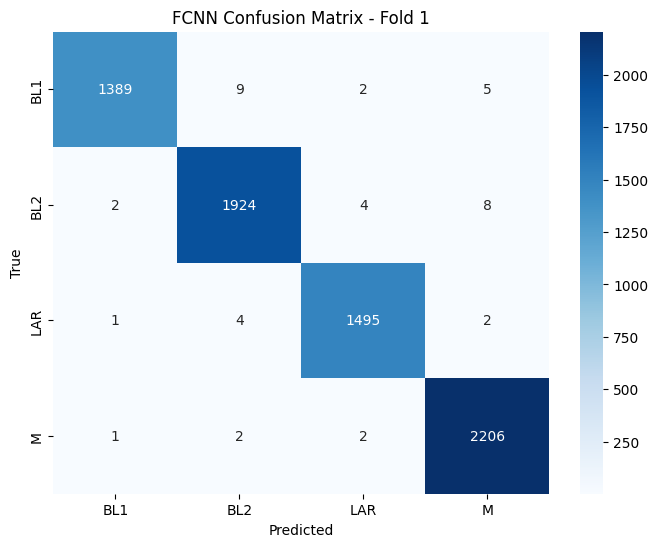


Multi-Class AUC (Fold 1): 1.0000


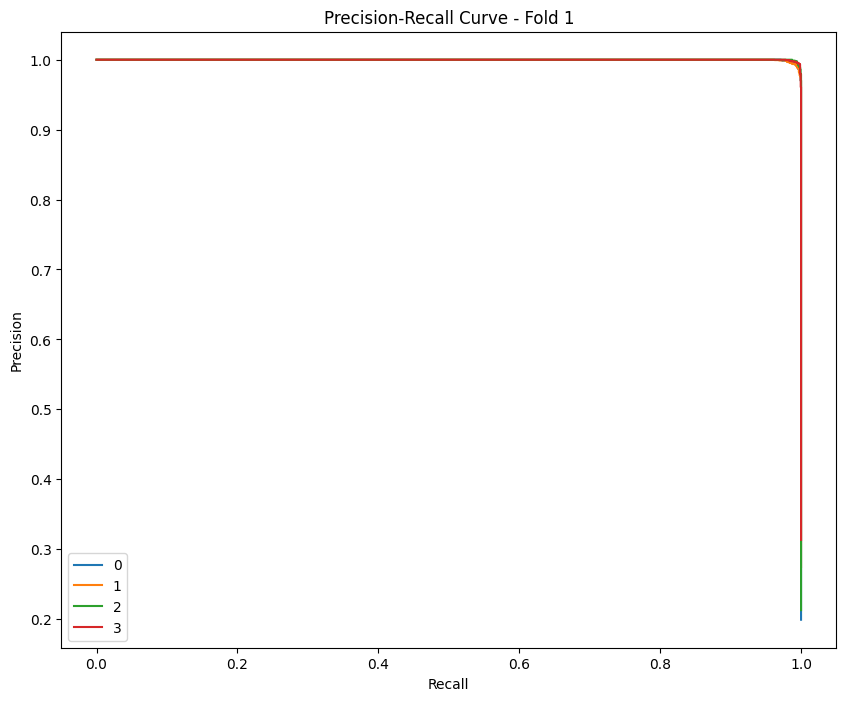

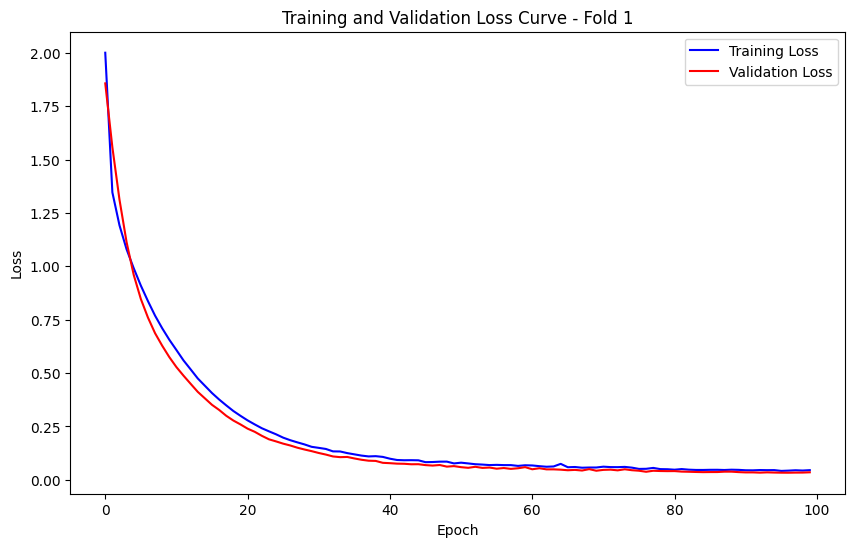

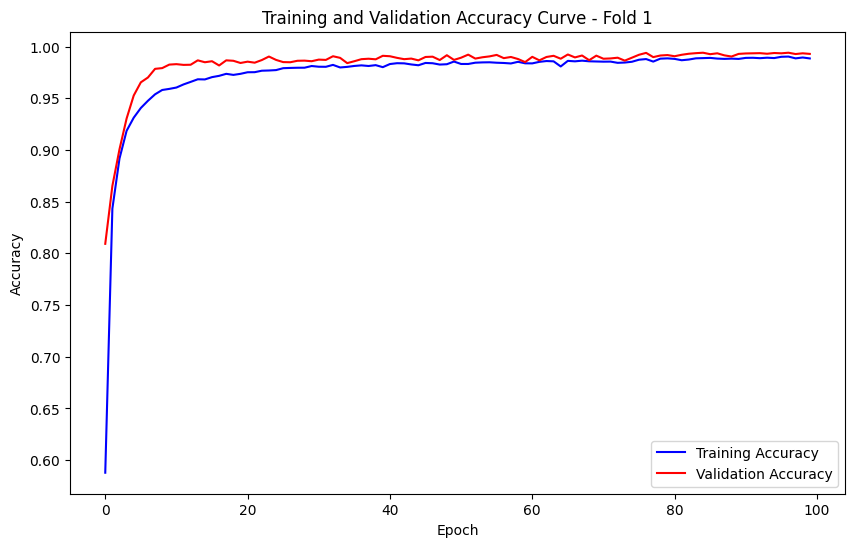


===== Fold 2 =====

Best Hyperparameters for Fold 2:
{'units_1': 160, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.1, 'units_3': 16, 'dropout_3': 0.4, 'learning_rate': 0.0003243806953412315}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.4394 - loss: 2.3762 - val_accuracy: 0.8731 - val_loss: 1.9134 - learning_rate: 3.2438e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7720 - loss: 1.5077 - val_accuracy: 0.9064 - val_loss: 1.5876 - learning_rate: 3.2438e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8595 - loss: 1.2742 - val_accuracy: 0.9398 - val_loss: 1.3012 - learning_rate: 3.2438e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9019 - loss: 1.1270 - val_accuracy: 0.9593 - val_loss: 1.0894 - learning_rate: 3.2438e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9218 - loss: 1.0250 - val_accuracy: 0.9675 - val_loss: 0.9409 - learning_rate: 3.2438e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9370 - loss: 0.9337 - val_accuracy: 0.9728 - val_loss: 0.8331 - learning_rate: 3.2438e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9422 - loss: 0.8

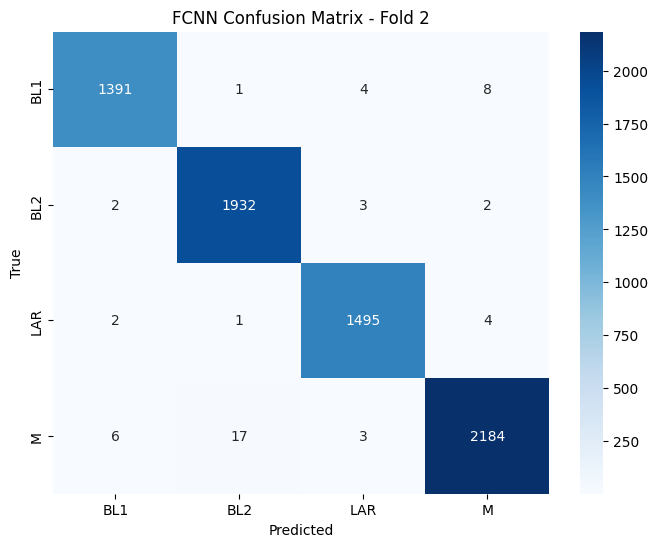


Multi-Class AUC (Fold 2): 0.9999


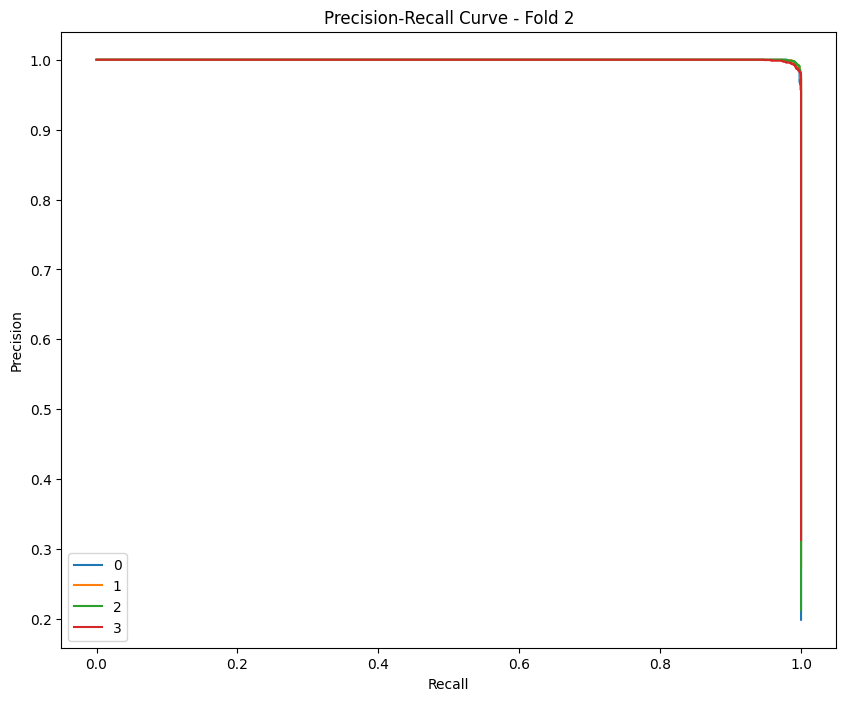

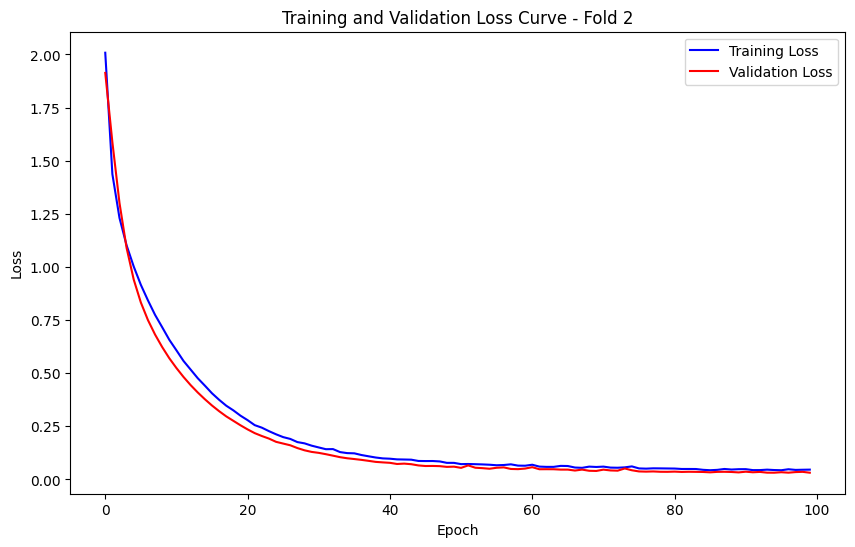

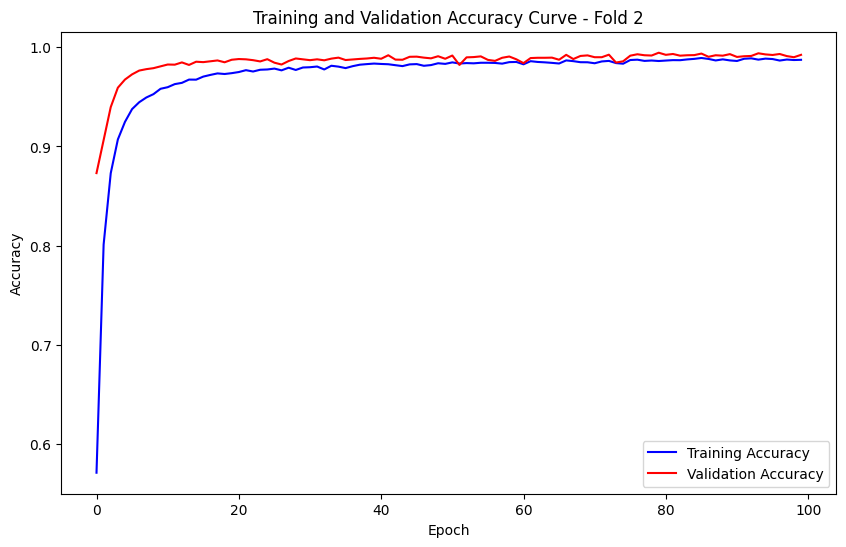


===== Fold 3 =====

Best Hyperparameters for Fold 3:
{'units_1': 160, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.1, 'units_3': 16, 'dropout_3': 0.4, 'learning_rate': 0.0003243806953412315}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.3961 - loss: 2.4936 - val_accuracy: 0.7931 - val_loss: 1.9595 - learning_rate: 3.2438e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 1.5411 - val_accuracy: 0.8187 - val_loss: 1.6855 - learning_rate: 3.2438e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8384 - loss: 1.3317 - val_accuracy: 0.8703 - val_loss: 1.4398 - learning_rate: 3.2438e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8820 - loss: 1.1974 - val_accuracy: 0.9266 - val_loss: 1.2121 - learning_rate: 3.2438e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9095 - loss: 1.0861 - val_accuracy: 0.9555 - val_loss: 1.0260 - learning_rate: 3.2438e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.9933 - val_accuracy: 0.9675 - val_loss: 0.8874 - learning_rate: 3.2438e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9341 - loss: 0.9

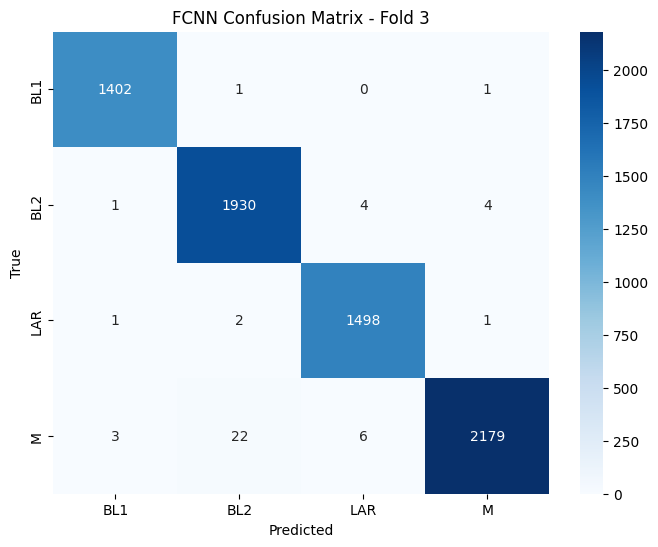


Multi-Class AUC (Fold 3): 1.0000


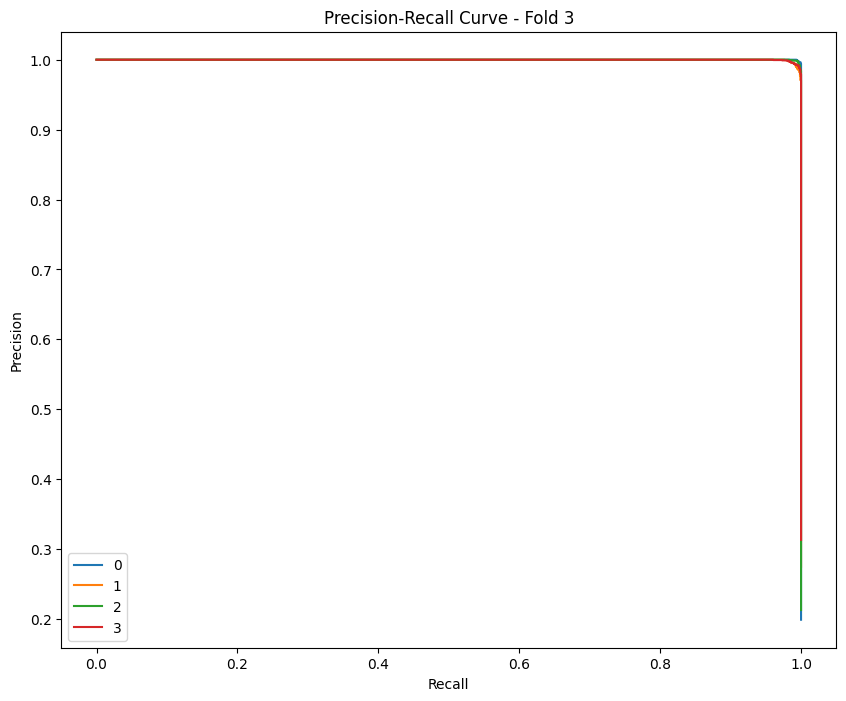

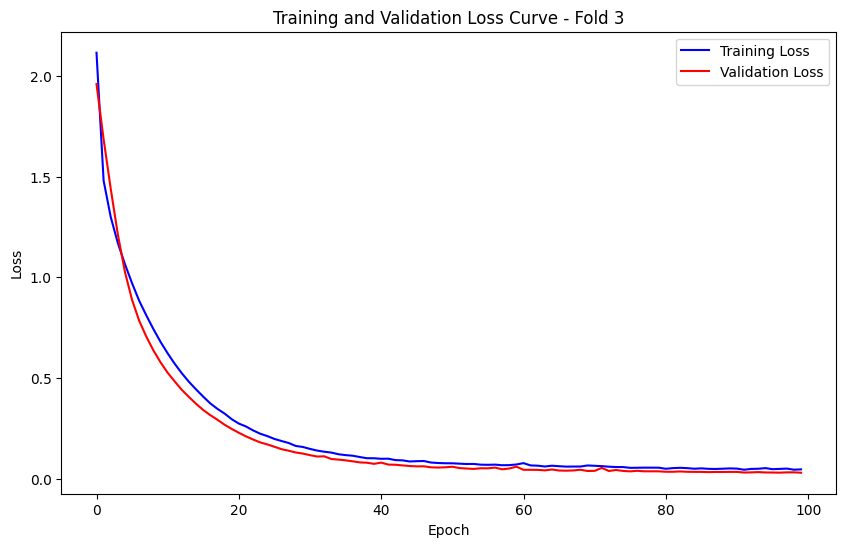

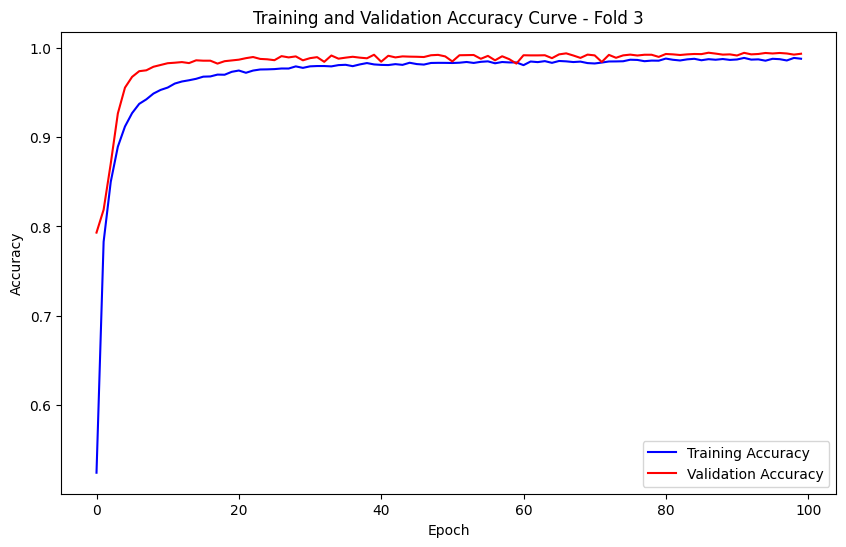


===== Fold 4 =====

Best Hyperparameters for Fold 4:
{'units_1': 160, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.1, 'units_3': 16, 'dropout_3': 0.4, 'learning_rate': 0.0003243806953412315}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.4037 - loss: 2.4921 - val_accuracy: 0.8340 - val_loss: 1.9720 - learning_rate: 3.2438e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 1.5173 - val_accuracy: 0.8846 - val_loss: 1.6669 - learning_rate: 3.2438e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8550 - loss: 1.2979 - val_accuracy: 0.9334 - val_loss: 1.3714 - learning_rate: 3.2438e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8971 - loss: 1.1520 - val_accuracy: 0.9552 - val_loss: 1.1370 - learning_rate: 3.2438e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9176 - loss: 1.0415 - val_accuracy: 0.9677 - val_loss: 0.9672 - learning_rate: 3.2438e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9297 - loss: 0.9532 - val_accuracy: 0.9741 - val_loss: 0.8450 - learning_rate: 3.2438e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9385 - loss: 0.8

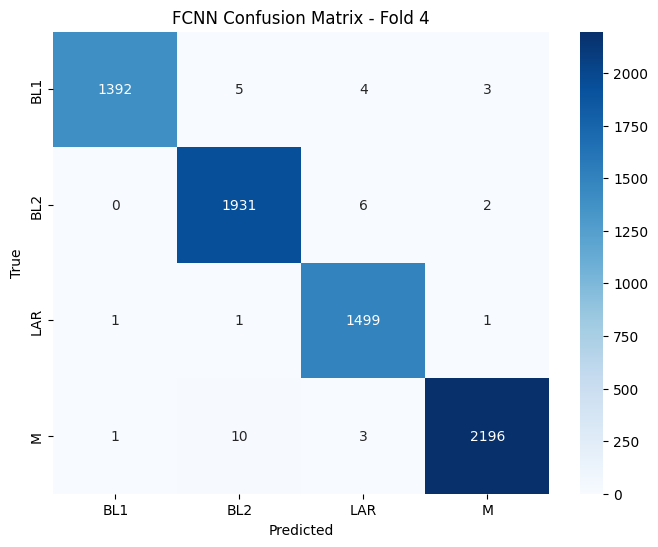


Multi-Class AUC (Fold 4): 1.0000


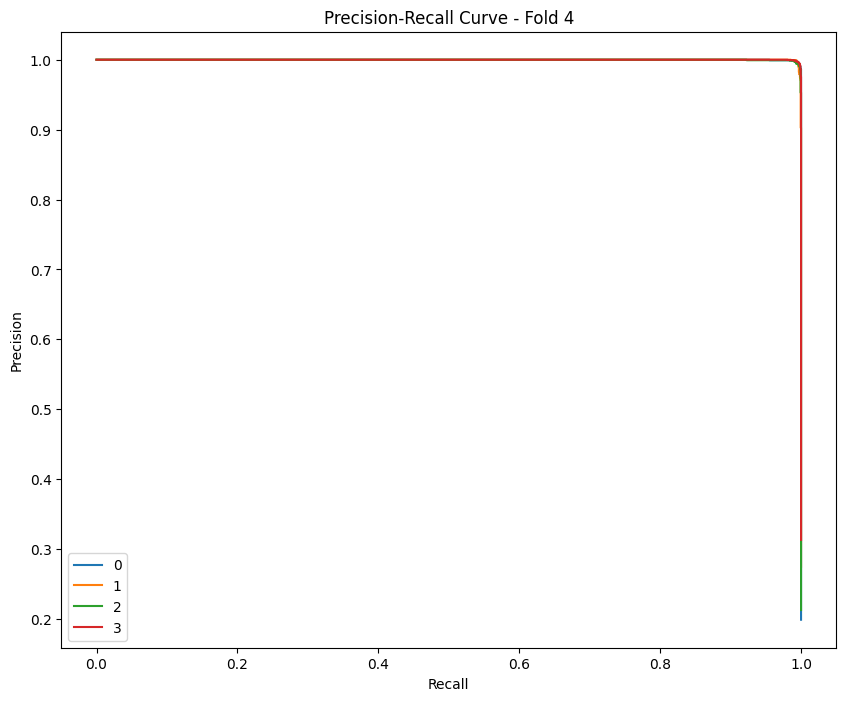

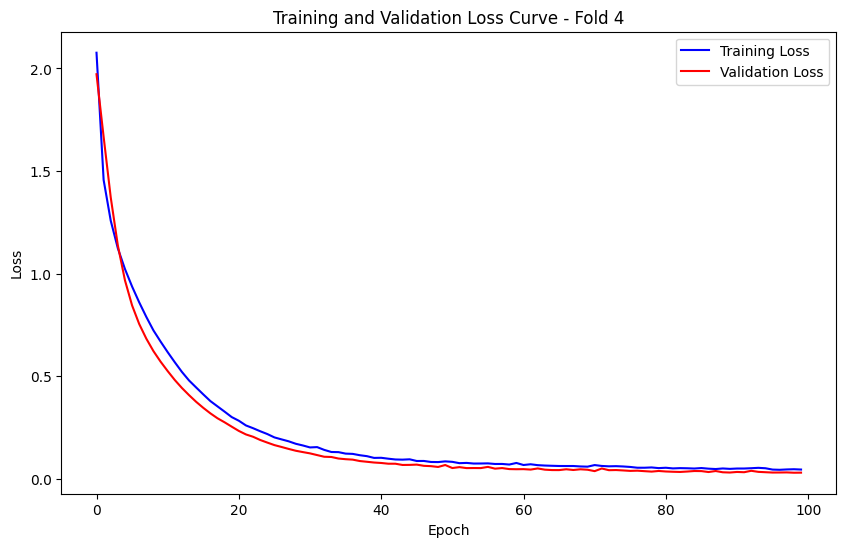

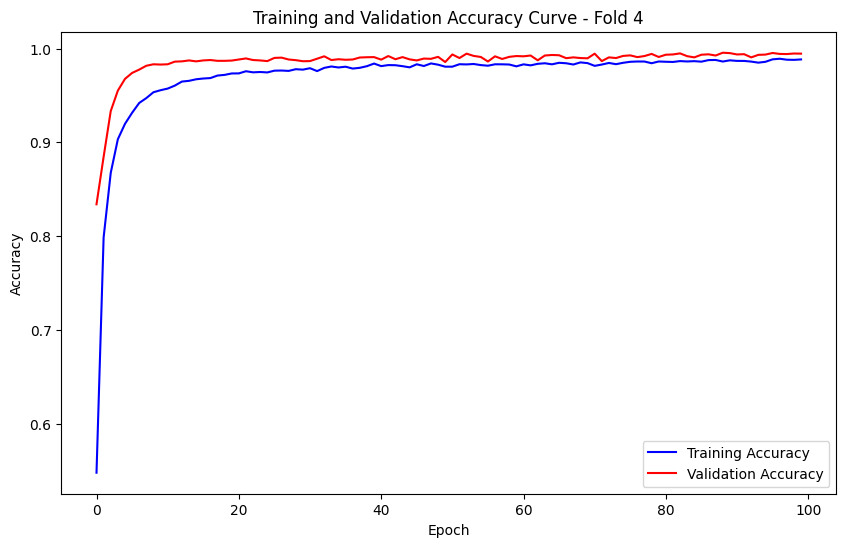


===== Fold 5 =====

Best Hyperparameters for Fold 5:
{'units_1': 160, 'dropout_1': 0.1, 'units_2': 32, 'dropout_2': 0.1, 'units_3': 16, 'dropout_3': 0.4, 'learning_rate': 0.0003243806953412315}
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.5398 - loss: 2.1073 - val_accuracy: 0.8717 - val_loss: 1.8646 - learning_rate: 3.2438e-04
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8279 - loss: 1.4102 - val_accuracy: 0.9331 - val_loss: 1.5473 - learning_rate: 3.2438e-04
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8892 - loss: 1.2252 - val_accuracy: 0.9522 - val_loss: 1.2853 - learning_rate: 3.2438e-04
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9132 - loss: 1.1005 - val_accuracy: 0.9651 - val_loss: 1.0815 - learning_rate: 3.2438e-04
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9288 - loss: 0.9925 - val_accuracy: 0.9692 - val_loss: 0.9293 - learning_rate: 3.2438e-04
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9382 - loss: 0.9053 - val_accuracy: 0.9759 - val_loss: 0.8134 - learning_rate: 3.2438e-04
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.8

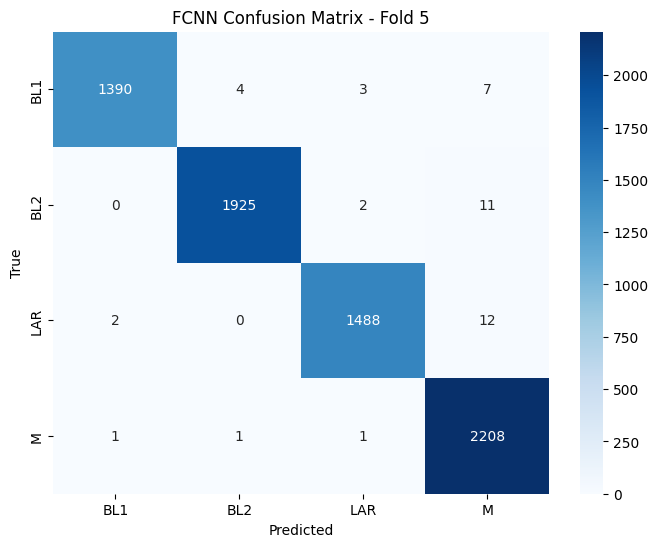


Multi-Class AUC (Fold 5): 1.0000


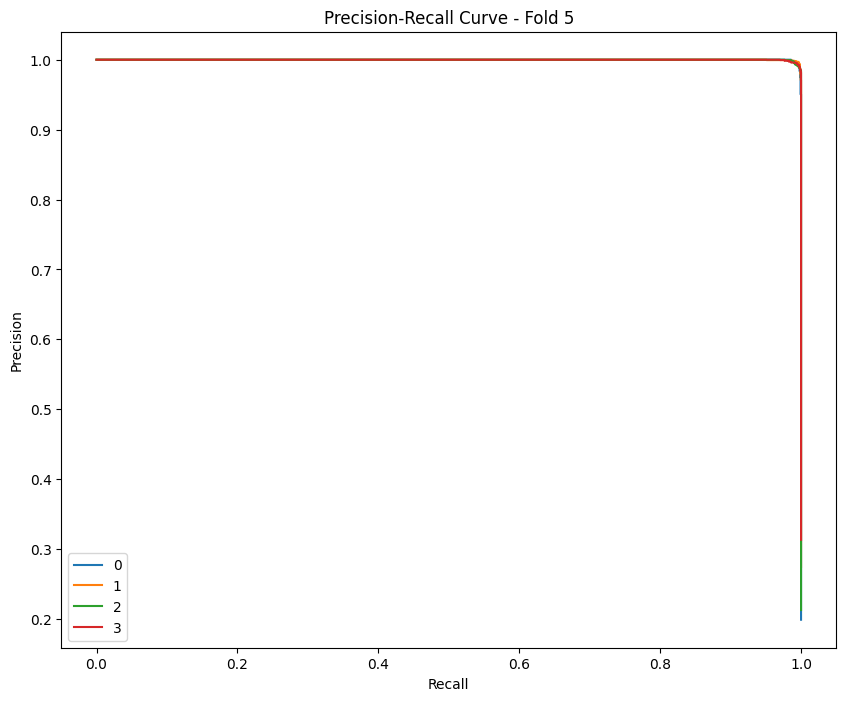

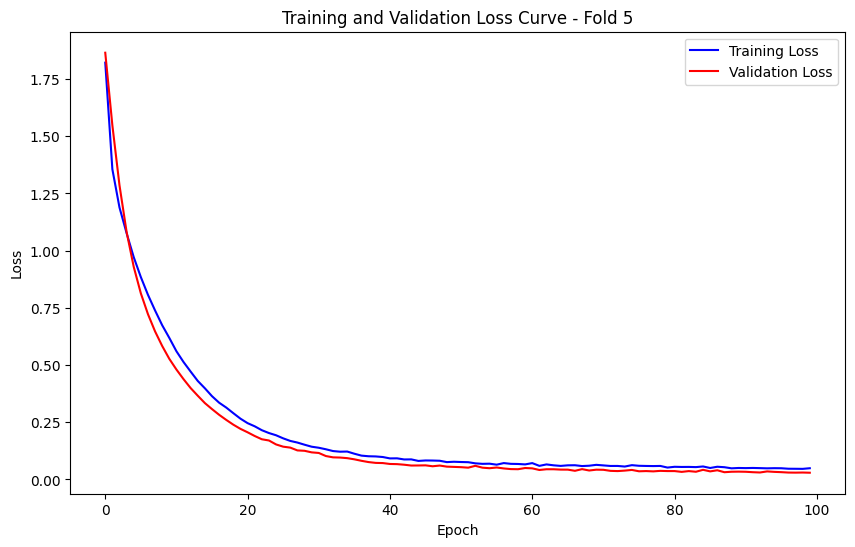

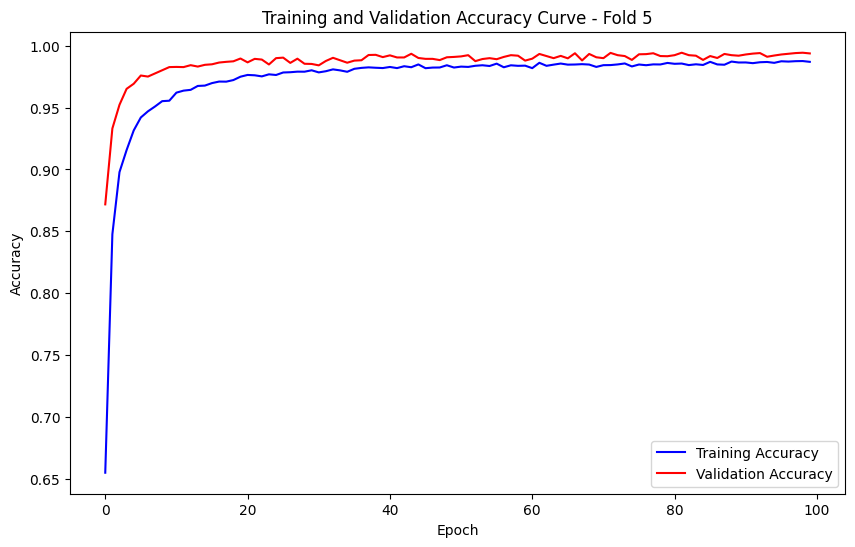


===== Cross-Validation Results =====
   fold  accuracy  auc_score
0     1  0.992914   0.999958
1     2  0.992488   0.999944
2     3  0.993480   0.999963
3     4  0.994614   0.999967
4     5  0.993763   0.999965

Mean Accuracy: 0.9935
Mean AUC Score: 1.0000

🎯 Best Fold (Fold 4) Accuracy: 0.9946
🎯 Best Fold AUC Score: 1.0000


In [ ]:
# ======================= Load Data =======================

df_metabolites = pd.read_csv("/content/drive/MyDrive/MY THESIS/Thesis/metabolites_umap_training_.csv")


# ======================= Encode Target Variable =======================
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_metabolites["TNBC_Subtype"])  # Encode TNBC subtypes
X = df_metabolites.drop(columns=["TNBC_Subtype"]).values  # Keep only metabolite features

# ======================= Standardize Features =======================
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ======================= Stratified K-Fold =======================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

# ======================= Build Model Function =======================
def build_model(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X.shape[1],)),

        # First Dense Layer
        tf.keras.layers.Dense(hp.Int('units_1', min_value=64, max_value=256, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_1', 0.1, 0.5, step=0.1)),

        # Second Dense Layer
        tf.keras.layers.Dense(hp.Int('units_2', min_value=32, max_value=128, step=32),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_2', 0.1, 0.5, step=0.1)),

        # Third Dense Layer
        tf.keras.layers.Dense(hp.Int('units_3', min_value=16, max_value=64, step=16),
                              activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(hp.Float('dropout_3', 0.1, 0.5, step=0.1)),

        # Output Layer
        tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float("learning_rate", 1e-4, 1e-2, sampling='LOG'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# ======================= Hyperparameter Tuning =======================
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,
    executions_per_trial=3,
    directory='tuner_results',
    project_name='TNBC_hyperparam_tuning'
)

# ======================= Train and Evaluate Using K-Fold =======================
fold = 1
for train_index, test_index in skf.split(X, y):
    print(f"\n===== Fold {fold} =====")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Hyperparameter tuning
    tuner.search(X_train, y_train,
                 epochs=100,
                 validation_data=(X_test, y_test),
                 batch_size=512)

    # Get best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=3)[0]
    print(f"\nBest Hyperparameters for Fold {fold}:\n{best_hps.values}")

    # Build model with best hyperparameters
    model = tuner.hypermodel.build(best_hps)

    # ===========Callbacks (Early Stopping + Learning Rate Scheduler)===========
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )

    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-5
    )

    # ===========Train model===============
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=512,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, lr_scheduler]
    )

    # Predictions
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_pred_proba = model.predict(X_test)


    # ======================= Metrics =======================
    target_names = label_encoder.classes_.astype(str)  # Ensure target names are strings
    report = classification_report(y_test, y_pred, target_names=target_names)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
    plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


    # # ======================= Metrics =======================
    # target_names = label_encoder.classes_.astype(str)
    # report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    # print("\nClassification Report:\n", report)

    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["BL1", "BL2", "LAR", "M"], yticklabels=["BL1", "BL2", "LAR", "M"])
    # plt.title(f"FCNN Confusion Matrix - Fold {fold}")
    # plt.xlabel('Predicted')
    # plt.ylabel('True')
    # plt.show()


    # ===========ROC-AUC Score===========
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=len(label_encoder.classes_))
    auc_score = roc_auc_score(y_test_one_hot, y_pred_proba, multi_class='ovr')
    print(f"\nMulti-Class AUC (Fold {fold}): {auc_score:.4f}")

    # ===========Precision-Recall Curve===========
    plt.figure(figsize=(10, 8))
    for i in range(len(label_encoder.classes_)):
        precision, recall, _ = precision_recall_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"{label_encoder.classes_[i]}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - Fold {fold}")
    plt.legend()
    plt.show()

    # ===========Loss and Accuracy Curves===========
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
    plt.title(f"Training and Validation Loss Curve - Fold {fold}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title(f"Training and Validation Accuracy Curve - Fold {fold}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Save results
    results.append({
        'fold': fold,
        'accuracy': history.history['val_accuracy'][-1],
        'auc_score': auc_score
    })

    fold += 1

# ======================= Overall Results =======================
df_results = pd.DataFrame(results)
print("\n===== Cross-Validation Results =====")
print(df_results)
print(f"\nMean Accuracy: {df_results['accuracy'].mean():.4f}")
print(f"Mean AUC Score: {df_results['auc_score'].mean():.4f}")

best_fold = df_results.loc[df_results['accuracy'].idxmax()]
print(f"\n🎯 Best Fold (Fold {int(best_fold['fold'])}) Accuracy: {best_fold['accuracy']:.4f}")
print(f"🎯 Best Fold AUC Score: {best_fold['auc_score']:.4f}")

##===Save Models for Comparabilty and Web App======

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/SAVED_MODELS/DEEPLEARNING/UMAP/FCNN_M.pth')
print("FCNN model saved successfully!")